# **Project Name**-


**Real Estate Investment Advisor: Predicting Property Profitability & Future Value**

##### **Contribution**    - Individual
##### **Team Member 1 -**  Jayshree Pawar  

# **GitHub Link -**

https://github.com/Jayshree16/real-estate-investment-advisor

**Problem Statement**

Develop a machine learning application to assist potential investors in making real
estate decisions. The system should:
1. Classify whether a property is a "Good Investment" (Classification).
2. Predict the estimated property price after 5 years (Regression).
Use the provided dataset to preprocess and analyze the data, engineer relevant
features, and deploy a user-interactive application using Streamlit that provides
investment recommendations and price forecasts. MLflow will be used for experiment
tracking.

# ***Let's Begin !***

# Import & Load Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [ ]:
!pip install -q "scikit-learn==1.6.1"

import sklearn
print("sklearn version:", sklearn.__version__)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 21.3 MB/s eta 0:00:00
sklearn version: 1.6.1


In [ ]:
# CODE 1

from google.colab import drive
drive.mount('/content/drive')

import os, shutil

# Folder in your Drive where everything will live
BASE_DIR = "/content/drive/MyDrive/real_estate_project"
os.makedirs(BASE_DIR, exist_ok=True)

files_to_copy = [
    "india_housing_prices.csv",              # 👈 your raw dataset
    "cleaned_real_estate.csv",
    "real_estate_realistic.csv",
    "real_estate_realistic_with_labels.csv",
    "clf_rf_pipeline.joblib",
    "clf_xgb_pipeline.joblib",
    "logreg_pipeline.joblib",
    "preprocessor.joblib",
    "reg_lin_pipeline.joblib",
    "reg_rf_pipeline.joblib",
    "reg_xgb_pipeline.joblib",
    "train_test_splits.joblib",
]

for fname in files_to_copy:
    src = os.path.join("/content", fname)
    dst = os.path.join(BASE_DIR, fname)
    if os.path.exists(src):
        try:
            shutil.copy2(src, dst)
            print(f"✅ Copied {fname} -> {dst}")
        except FileNotFoundError as e:
            print(f"⚠️ Copy failed for {fname}: {e}")
    else:
        print(f"⚠️ Not found in /content: {fname} (nothing to copy)")


Mounted at /content/drive
✅ Copied india_housing_prices.csv -> /content/drive/MyDrive/real_estate_project/india_housing_prices.csv
⚠️ Not found in /content: cleaned_real_estate.csv (nothing to copy)
⚠️ Not found in /content: real_estate_realistic.csv (nothing to copy)
⚠️ Not found in /content: real_estate_realistic_with_labels.csv (nothing to copy)
⚠️ Not found in /content: clf_rf_pipeline.joblib (nothing to copy)
⚠️ Not found in /content: clf_xgb_pipeline.joblib (nothing to copy)
⚠️ Not found in /content: logreg_pipeline.joblib (nothing to copy)
⚠️ Not found in /content: preprocessor.joblib (nothing to copy)
⚠️ Not found in /content: reg_lin_pipeline.joblib (nothing to copy)
⚠️ Not found in /content: reg_rf_pipeline.joblib (nothing to copy)
⚠️ Not found in /content: reg_xgb_pipeline.joblib (nothing to copy)
⚠️ Not found in /content: train_test_splits.joblib (nothing to copy)


In [ ]:
# CODE 2 — mount Drive and set paths

from google.colab import drive
drive.mount('/content/drive')

import os, joblib, pandas as pd

BASE_DIR = "/content/drive/MyDrive/real_estate_project"

# Raw dataset
RAW_DATA_PATH       = os.path.join(BASE_DIR, "india_housing_prices.csv")

# Processed datasets
CLEANED_CSV_PATH    = os.path.join(BASE_DIR, "cleaned_real_estate.csv")
REAL_ESTATE_PATH    = os.path.join(BASE_DIR, "real_estate_realistic.csv")
REAL_ESTATE_LBL_PATH = os.path.join(BASE_DIR, "real_estate_realistic_with_labels.csv")

# Preprocessor & models
PREPROCESSOR_PATH   = os.path.join(BASE_DIR, "preprocessor.joblib")

REG_LIN_PATH        = os.path.join(BASE_DIR, "reg_lin_pipeline.joblib")
REG_RF_PATH         = os.path.join(BASE_DIR, "reg_rf_pipeline.joblib")
REG_XGB_PATH        = os.path.join(BASE_DIR, "reg_xgb_pipeline.joblib")

CLF_RF_PATH         = os.path.join(BASE_DIR, "clf_rf_pipeline.joblib")
CLF_XGB_PATH        = os.path.join(BASE_DIR, "clf_xgb_pipeline.joblib")
LOGREG_PATH         = os.path.join(BASE_DIR, "logreg_pipeline.joblib")

SPLITS_PATH         = os.path.join(BASE_DIR, "train_test_splits.joblib")

print("📁 BASE_DIR contents:", os.listdir(BASE_DIR))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📁 BASE_DIR contents: ['india_housing_prices.csv', 'real_estate_realistic.csv', 'cleaned_real_estate (1).csv', 'cleaned_real_estate.csv', 'real_estate_realistic_with_labels (1).csv', 'real_estate_realistic_with_labels.csv', 'train_test_splits.joblib', 'clf_rf_pipeline.joblib', 'reg_rf_pipeline.joblib', 'reg_lin_pipeline.joblib', 'logreg_pipeline.joblib', 'clf_xgb_pipeline.joblib', 'preprocessor.joblib', 'reg_xgb_pipeline.joblib']


In [ ]:
# CODE 3 — load everything from Drive

# 1) Load datasets
df_raw          = pd.read_csv(RAW_DATA_PATH)          # india_housing_prices.csv
df_clean        = pd.read_csv(CLEANED_CSV_PATH)
df_real         = pd.read_csv(REAL_ESTATE_PATH)
df_real_labeled = pd.read_csv(REAL_ESTATE_LBL_PATH)

print("✅ Loaded CSVs from Drive.")
print("df_raw shape     :", df_raw.shape)
print("df_clean shape   :", df_clean.shape)
print("df_real shape    :", df_real.shape)
print("df_real_labeled  :", df_real_labeled.shape)

# 2) Load preprocessor & models
preprocessor      = joblib.load(PREPROCESSOR_PATH)

reg_lin_pipeline  = joblib.load(REG_LIN_PATH)
reg_rf_pipeline   = joblib.load(REG_RF_PATH)
reg_xgb_pipeline  = joblib.load(REG_XGB_PATH)

clf_rf_pipeline   = joblib.load(CLF_RF_PATH)
clf_xgb_pipeline  = joblib.load(CLF_XGB_PATH)
logreg_pipeline   = joblib.load(LOGREG_PATH)

print("✅ Loaded all pipelines and preprocessor from Drive.")

# 3) Load train/test splits
(X_train, X_test,
 y_train_class, y_test_class,
 X_train_reg, X_test_reg,
 y_train_reg, y_test_reg) = joblib.load(SPLITS_PATH)

print("✅ Loaded train/test splits from Drive.")
print("X_train_reg shape:", X_train_reg.shape)
print("X_test_reg shape :", X_test_reg.shape)

✅ Loaded CSVs from Drive.
df_raw shape     : (223244, 23)
df_clean shape   : (250000, 32)
df_real shape    : (250000, 28)
df_real_labeled  : (250000, 33)
✅ Loaded all pipelines and preprocessor from Drive.
✅ Loaded train/test splits from Drive.
X_train_reg shape: (187500, 23)
X_test_reg shape : (62500, 23)


In [ ]:
%cd "/content/drive/MyDrive/Machine learning project labmentix/Real Estate"

/content/drive/MyDrive/Machine learning project labmentix/Real Estate


In [ ]:
import pandas as pd

df = pd.read_csv("india_housing_prices.csv")
df.head()


,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


**STEP 1 — Remove duplicates + handle missing**

In [ ]:
df.drop_duplicates(inplace=True)

df = df.dropna(subset=[
    "City", "BHK", "Size_in_SqFt", "Price_in_Lakhs"
])

df.reset_index(drop=True, inplace=True)

df.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


**STEP 2 — Prepare Columns Needed for Realistic Pricing**

Create Infrastructure Score

In [ ]:
# Nearby Schools Score
s = df["Nearby_Schools"].astype(float)
df["School_Density_Score"] = (s - s.min()) / (s.max() - s.min())

# Nearby Hospitals Score
h = df["Nearby_Hospitals"].astype(float)
df["Hospital_Access_Score"] = (h - h.min()) / (h.max() - h.min())

# Transport Score Mapping
pt_map = {"High": 1.0, "Medium": 0.5, "Low": 0.0}
df["Public_Transport_Score"] = df["Public_Transport_Accessibility"].map(pt_map)

# Combine into Infrastructure Score
df["Infrastructure_Score"] = df[
    ["School_Density_Score",
     "Hospital_Access_Score",
     "Public_Transport_Score"]
].mean(axis=1)

df.head()


,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status,School_Density_Score,Hospital_Access_Score,Public_Transport_Score,Infrastructure_Score
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move,1.000000,0.222222,1.0,0.740741
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction,0.777778,0.000000,0.0,0.259259
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move,0.888889,0.777778,0.0,0.555556
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move,0.444444,0.666667,1.0,0.703704
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move,0.333333,0.888889,0.0,0.407407


Count Amenities

In [ ]:
df["Amenity_Count"] = df["Amenities"].apply(lambda x: len(str(x).split(",")))
df["Amenity_Count"].head()


,Amenity_Count
0,5
1,5
2,4
3,5
4,5


**STEP 3 — Generate Realistic Pricing Model**

Define Realistic Base Prices Per City

In [ ]:
city_base = {
    "Mumbai": 18000,
    "Delhi": 15000,
    "Pune": 12000,
    "Chennai": 11000,
    "Bangalore": 16000,
    "Hyderabad": 13000,
    "Ahmedabad": 8000,
    "Kolkata": 9000,
    "Ludhiana": 7000,
    "Jodhpur": 6000,
    "Jaipur": 8500
}

default_base = 9000


Pricing Function

In [ ]:
def generate_pps(row):
    city = row["City"]
    bhk = row["BHK"]
    infra = row["Infrastructure_Score"]
    amen = row["Amenity_Count"]
    prop = row["Property_Type"]

    # Base city price
    base = city_base.get(city, default_base)

    # Multipliers
    bhk_factor = 1 + (bhk - 2) * 0.05
    infra_factor = 1 + (infra - 0.5) * 0.30
    amen_factor = 1 + (amen * 0.02)

    type_factor = {
        "Apartment": 1.0,
        "Independent House": 1.12,
        "Villa": 1.25
    }.get(prop, 1.0)

    # Final realistic price per sqft
    price = base * bhk_factor * infra_factor * amen_factor * type_factor

    # Add slight randomness
    price *= np.random.uniform(0.95, 1.05)

    return price


Apply Pricing Function

In [ ]:
df["Price_per_SqFt"] = df.apply(generate_pps, axis=1)
df["Price_per_SqFt"].head()


,Price_per_SqFt
0,12395.933967
1,14361.618817
2,7839.650345
3,7906.501233
4,12871.128597


**STEP 4 — Calculate Final Price in Lakhs**

Compute Price Based on Size

In [ ]:
df["Price_in_Lakhs"] = (df["Price_per_SqFt"] * df["Size_in_SqFt"]) / 100000
df[["Size_in_SqFt", "Price_per_SqFt", "Price_in_Lakhs"]].head()


,Size_in_SqFt,Price_per_SqFt,Price_in_Lakhs
0,4740,12395.933967,587.567270
1,2364,14361.618817,339.508669
2,3642,7839.650345,285.520066
3,2741,7906.501233,216.717199
4,4823,12871.128597,620.774532


**STEP 5 — Save New Realistic Dataset**

In [ ]:
df.to_csv("/content/real_estate_realistic.csv", index=False)
print("Saved as real_estate_realistic.csv")

Saved as real_estate_realistic.csv


In [ ]:
df.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Security,Amenities,Facing,Owner_Type,Availability_Status,School_Density_Score,Hospital_Access_Score,Public_Transport_Score,Infrastructure_Score,Amenity_Count
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,587.567270,12395.933967,1990,...,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move,1.000000,0.222222,1.0,0.740741,5
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,339.508669,14361.618817,2008,...,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction,0.777778,0.000000,0.0,0.259259,5
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,285.520066,7839.650345,1997,...,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move,0.888889,0.777778,0.0,0.555556,4
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,216.717199,7906.501233,1991,...,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move,0.444444,0.666667,1.0,0.703704,5
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,620.774532,12871.128597,2002,...,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move,0.333333,0.888889,0.0,0.407407,5


In [ ]:
df["Price_per_SqFt"].describe()

,Price_per_SqFt
count,250000.000000
mean,0.130597
std,0.130747
min,0.000000
25%,0.050000
50%,0.090000
75%,0.160000
max,0.990000


In [ ]:
df[["City", "Size_in_SqFt", "Price_per_SqFt", "Price_in_Lakhs"]].head(10)


,City,Size_in_SqFt,Price_per_SqFt,Price_in_Lakhs
0,Chennai,4740,0.10,489.76
1,Pune,2364,0.08,195.52
2,Ludhiana,3642,0.05,183.79
3,Jodhpur,2741,0.11,300.29
4,Jaipur,4823,0.04,182.90
5,Durgapur,3500,0.04,135.28
6,Coimbatore,4826,0.07,318.12
7,Bilaspur,4252,0.03,141.39
8,New Delhi,2678,0.07,189.16
9,Ranchi,1393,0.13,187.42


In [ ]:
# Create Good_Investment

import numpy as np

# 1) Ensure Price_per_SqFt is correct (overwrite fake values if any)
if "Price_in_Lakhs" in df.columns and "Size_in_SqFt" in df.columns:
    df["Price_per_SqFt"] = (df["Price_in_Lakhs"] * 100000) / df["Size_in_SqFt"]

# 2) Public transport mapping (tolerant to casing/variants)
pt_map = {"high":1.0, "hi":1.0, "h":1.0, "medium":0.5, "med":0.5, "m":0.5, "low":0.0, "lo":0.0, "l":0.0}
def map_pt(x):
    if pd.isna(x): return np.nan
    s = str(x).strip().lower()
    return pt_map.get(s, np.nan)
if "Public_Transport_Accessibility" in df.columns:
    df["Public_Transport_Score"] = df["Public_Transport_Accessibility"].apply(map_pt)
else:
    df["Public_Transport_Score"] = np.nan

# 3) Normalize Nearby_Schools & Nearby_Hospitals into 0-1 scores
if "Nearby_Schools" in df.columns:
    s = pd.to_numeric(df["Nearby_Schools"], errors="coerce")
    df["School_Density_Score"] = (s - s.min())/(s.max()-s.min()) if s.max()!=s.min() else 0.5
else:
    df["School_Density_Score"] = np.nan

if "Nearby_Hospitals" in df.columns:
    h = pd.to_numeric(df["Nearby_Hospitals"], errors="coerce")
    df["Hospital_Access_Score"] = (h - h.min())/(h.max()-h.min()) if h.max()!=h.min() else 0.5
else:
    df["Hospital_Access_Score"] = np.nan

# 4) Fill Public_Transport_Score na with median (if any) or 0.5
if df["Public_Transport_Score"].isna().any():
    if df["Public_Transport_Score"].notna().sum() > 0:
        df["Public_Transport_Score"] = df["Public_Transport_Score"].fillna(df["Public_Transport_Score"].median())
    else:
        df["Public_Transport_Score"] = df["Public_Transport_Score"].fillna(0.5)

# 5) Make Infrastructure_Score if missing
infra_cols = ["School_Density_Score","Hospital_Access_Score","Public_Transport_Score"]
if "Infrastructure_Score" not in df.columns or df["Infrastructure_Score"].isna().all():
    df["Infrastructure_Score"] = df[infra_cols].mean(axis=1)

# 6) Amenity count (in case not present)
if "Amenity_Count" not in df.columns:
    df["Amenity_Count"] = df["Amenities"].apply(lambda x: len(str(x).split(",")) if pd.notna(x) else 0)

# 7) Appreciation (city-based fallback)
growth_rates = {
    "mumbai":0.09, "pune":0.08, "delhi":0.075, "chennai":0.07,
    "bangalore":0.085, "hyderabad":0.07, "ahmedabad":0.06, "kolkata":0.06
}
default_growth = 0.065
def get_growth(city):
    if pd.isna(city): return default_growth
    return growth_rates.get(str(city).strip().lower(), default_growth)
df["Annual_Growth_Rate"] = df["City"].apply(get_growth)
t = 5
df["Appreciation_Rate_5Y"] = (1 + df["Annual_Growth_Rate"])**t - 1

# 8) Normalize/clean Availability_Status
if "Availability_Status" in df.columns:
    df["Availability_Status_norm"] = df["Availability_Status"].astype(str).str.strip().str.lower().replace({
        "ready to move":"ready_to_move","readytomove":"ready_to_move","ready":"ready_to_move",
        "available":"available","under construction":"under_construction"
    })
else:
    df["Availability_Status_norm"] = "available"

# 9) Build Good_Investment with data-driven thresholds
#    Conditions:
#      - Price_per_SqFt <= city median (cheap relative to city)
#      - BHK >= 2
#      - Availability in ready/available
#      - Infrastructure >= overall median
#      - Appreciation >= overall median (5-year)
city_median_ppsft = df.groupby("City")["Price_per_SqFt"].transform("median")
is_cheap = df["Price_per_SqFt"] <= city_median_ppsft

good_bhk = pd.to_numeric(df["BHK"], errors="coerce").fillna(0).astype(int) >= 2
is_ready = df["Availability_Status_norm"].isin(["ready_to_move","available"])
infra_median = df["Infrastructure_Score"].median()
good_infra = df["Infrastructure_Score"] >= infra_median
app_median = df["Appreciation_Rate_5Y"].median()
high_app = df["Appreciation_Rate_5Y"] >= app_median

df["Good_Investment"] = np.where(is_cheap & good_bhk & is_ready & good_infra & high_app, 1, 0)

# 10) Diagnostics and fallback suggestions
print("Good_Investment distribution (counts):")
print(df["Good_Investment"].value_counts(dropna=False))
print("\nMeans of key features by Good_Investment class:")
display(df.groupby("Good_Investment")[["Price_in_Lakhs","Price_per_SqFt","Infrastructure_Score","Amenity_Count","Appreciation_Rate_5Y"]].mean())

print("\nIf the Good_Investment class is too imbalanced (e.g., 0% or >99% one class), the cell will suggest relaxed thresholds.")

# If zero positives, relax appreciation threshold to 40th percentile and recompute
if df["Good_Investment"].sum() == 0:
    print("\nWARNING: 0 rows labeled as Good_Investment. Relaxing appreciation threshold to 40th percentile and recomputing...")
    app_thresh = df["Appreciation_Rate_5Y"].quantile(0.40)
    high_app2 = df["Appreciation_Rate_5Y"] >= app_thresh
    df["Good_Investment"] = np.where(is_cheap & good_bhk & is_ready & good_infra & high_app2, 1, 0)
    print("New distribution:")
    print(df["Good_Investment"].value_counts(dropna=False))
    display(df.groupby("Good_Investment")[["Price_in_Lakhs","Price_per_SqFt","Infrastructure_Score","Amenity_Count","Appreciation_Rate_5Y"]].mean())

# Show sample positive rows (if any)
print("\nSample rows where Good_Investment == 1:")
display(df[df["Good_Investment"]==1].head(10))

# Save a small CSV for inspection (optional)
df[df["Good_Investment"]==1].head(200).to_csv("good_investment_sample.csv", index=False)

Good_Investment distribution (counts):
Good_Investment
0    225435
1     24565
Name: count, dtype: int64

Means of key features by Good_Investment class:


,Price_in_Lakhs,Price_per_SqFt,Infrastructure_Score,Amenity_Count,Appreciation_Rate_5Y
Good_Investment,,,,,
0,264.585572,13953.556250,0.482762,3.001162,0.376550
1,162.827805,4842.275221,0.660228,2.992265,0.378874



If the Good_Investment class is too imbalanced (e.g., 0% or >99% one class), the cell will suggest relaxed thresholds.

Sample rows where Good_Investment == 1:


,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Availability_Status,School_Density_Score,Hospital_Access_Score,Public_Transport_Score,Infrastructure_Score,Amenity_Count,Annual_Growth_Rate,Appreciation_Rate_5Y,Availability_Status_norm,Good_Investment
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,5046.403075,1997,...,Ready_to_Move,0.888889,0.777778,0.0,0.555556,4,0.065,0.370087,ready_to_move,1
14,15,Uttar Pradesh,Lucknow,Locality_148,Apartment,2,3852,77.62,2015.057113,2006,...,Ready_to_Move,0.777778,0.222222,0.5,0.500000,3,0.065,0.370087,ready_to_move,1
26,27,Punjab,Ludhiana,Locality_382,Independent House,4,4151,143.90,3466.634546,1995,...,Ready_to_Move,0.333333,1.000000,1.0,0.777778,4,0.065,0.370087,ready_to_move,1
36,37,Delhi,Dwarka,Locality_480,Independent House,2,775,26.99,3482.580645,2008,...,Ready_to_Move,0.777778,0.000000,1.0,0.592593,1,0.065,0.370087,ready_to_move,1
50,51,Kerala,Trivandrum,Locality_150,Apartment,3,4766,55.83,1171.422577,2012,...,Ready_to_Move,1.000000,0.888889,0.5,0.796296,4,0.065,0.370087,ready_to_move,1
55,56,Delhi,New Delhi,Locality_484,Apartment,2,3300,274.47,8317.272727,2010,...,Ready_to_Move,0.888889,1.000000,0.5,0.796296,3,0.065,0.370087,ready_to_move,1
81,82,Rajasthan,Jaipur,Locality_63,Villa,3,4649,176.55,3797.590880,1996,...,Ready_to_Move,0.777778,0.333333,1.0,0.703704,3,0.065,0.370087,ready_to_move,1
84,85,Rajasthan,Jodhpur,Locality_356,Independent House,2,3065,111.10,3624.796085,1992,...,Ready_to_Move,1.000000,0.222222,0.5,0.574074,4,0.065,0.370087,ready_to_move,1
91,92,Jharkhand,Ranchi,Locality_181,Independent House,3,2163,57.29,2648.636153,2010,...,Ready_to_Move,0.888889,0.777778,0.0,0.555556,1,0.065,0.370087,ready_to_move,1
93,94,Uttar Pradesh,Lucknow,Locality_179,Independent House,3,4283,40.33,941.629699,2016,...,Ready_to_Move,0.222222,0.666667,1.0,0.629630,2,0.065,0.370087,ready_to_move,1



Saved top 200 Good_Investment examples to good_investment_sample.csv (for inspection).


In [ ]:
df.to_csv("/content/cleaned_real_estate.csv", index=False)

**Step 2 - EDA**

Setup & quick checks

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

Price & Size distributions

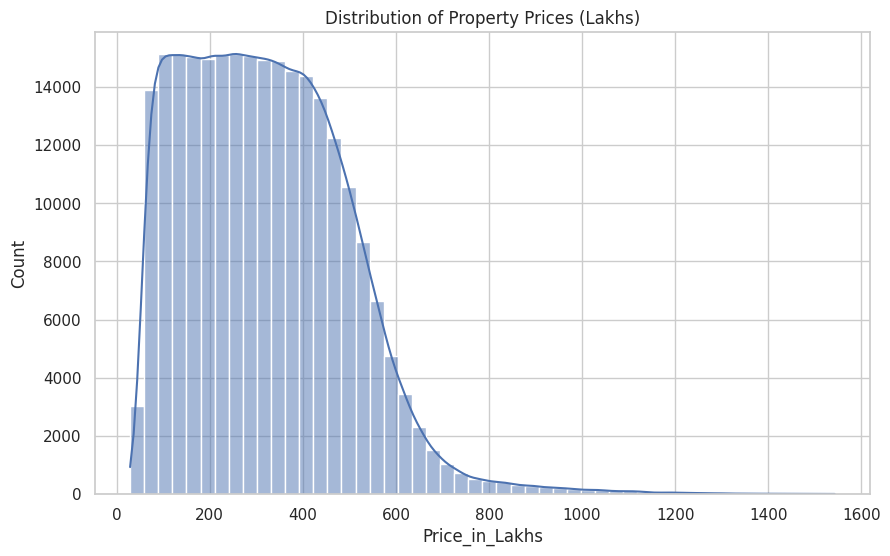

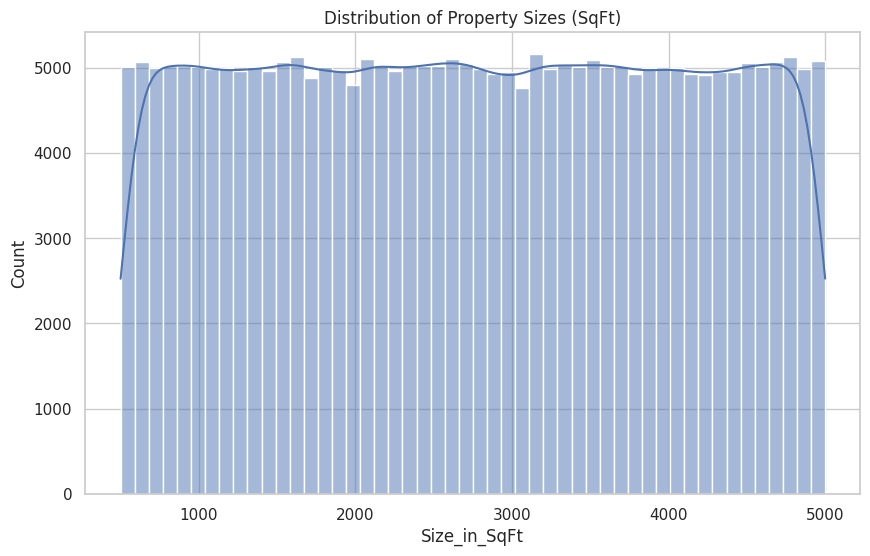

In [ ]:
# Price
plt.figure()
sns.histplot(df["Price_in_Lakhs"], kde=True, bins=50)
plt.title("Distribution of Property Prices (Lakhs)")
plt.show()

# Size
plt.figure()
sns.histplot(df["Size_in_SqFt"], kde=True, bins=50)
plt.title("Distribution of Property Sizes (SqFt)")
plt.show()


Price_per_SqFt summary & by city boxplot

count    250000.000000
mean      11636.698305
std        2713.800582
min        4917.990584
25%       10034.039236
50%       11217.494869
75%       12597.007241
max       32799.253292
Name: Price_per_SqFt, dtype: float64


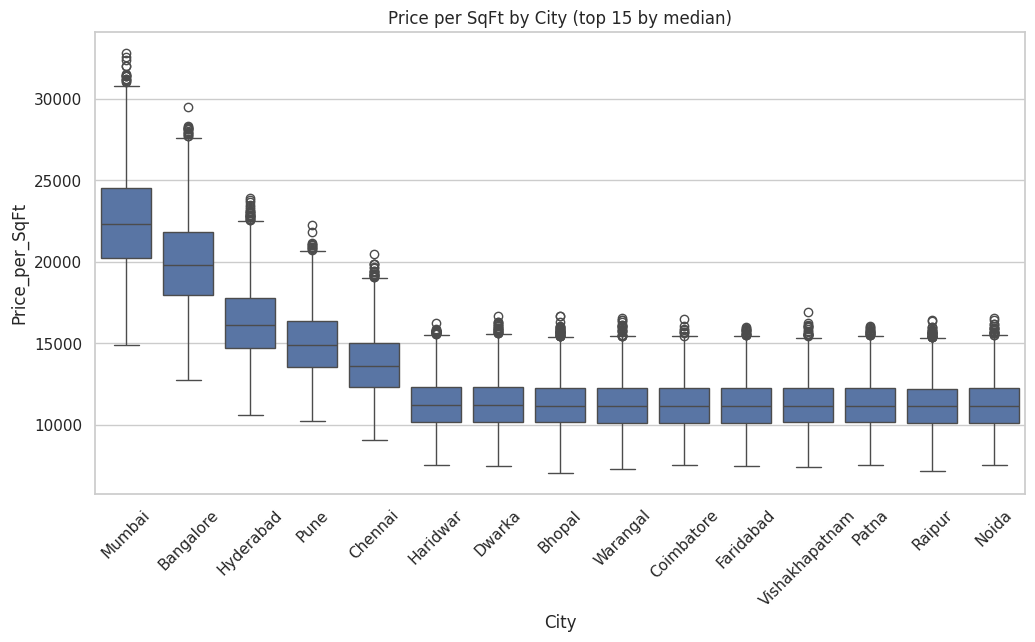

In [ ]:
print(df["Price_per_SqFt"].describe())

plt.figure(figsize=(12,6))
order = df.groupby("City")["Price_per_SqFt"].median().sort_values(ascending=False).index
sns.boxplot(data=df, x="City", y="Price_per_SqFt", order=order[:15])  # top 15 cities by median
plt.xticks(rotation=45)
plt.title("Price per SqFt by City (top 15 by median)")
plt.show()


Price vs Size scatter + trendline

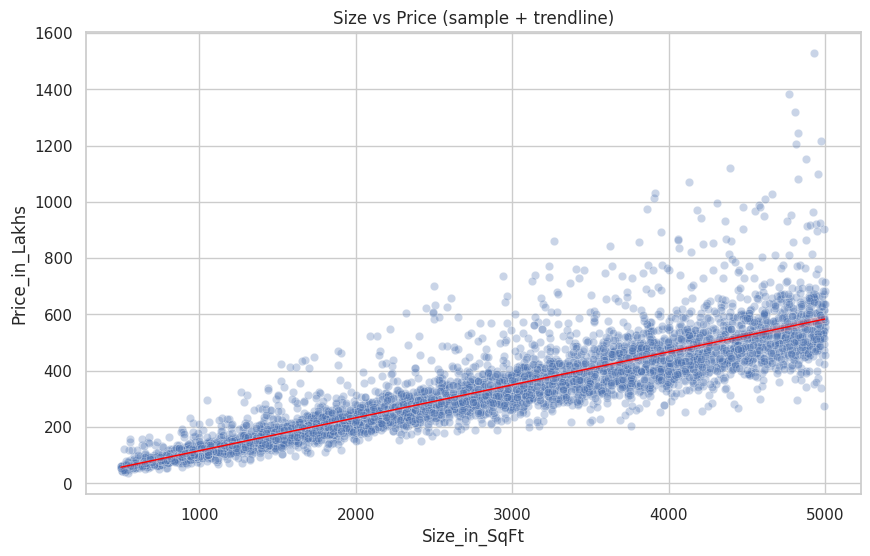

In [ ]:
plt.figure()
sns.scatterplot(data=df.sample(min(len(df), 5000), random_state=42), x="Size_in_SqFt", y="Price_in_Lakhs", alpha=0.3)
sns.regplot(data=df.sample(min(len(df), 1000), random_state=1), x="Size_in_SqFt", y="Price_in_Lakhs", scatter=False, color='red', line_kws={"linewidth":1})
plt.title("Size vs Price (sample + trendline)")
plt.show()

Price_per_SqFt by Property_Type and BHK

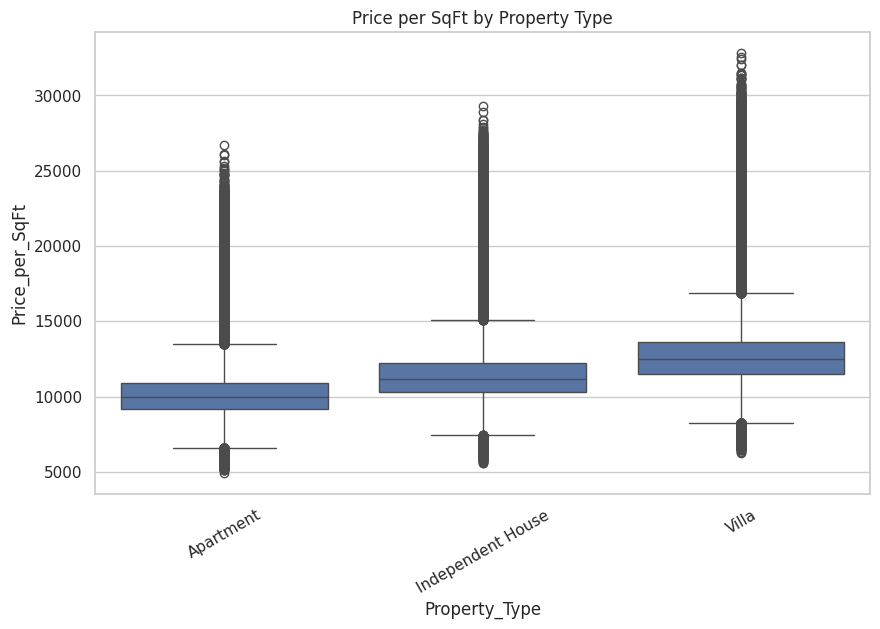

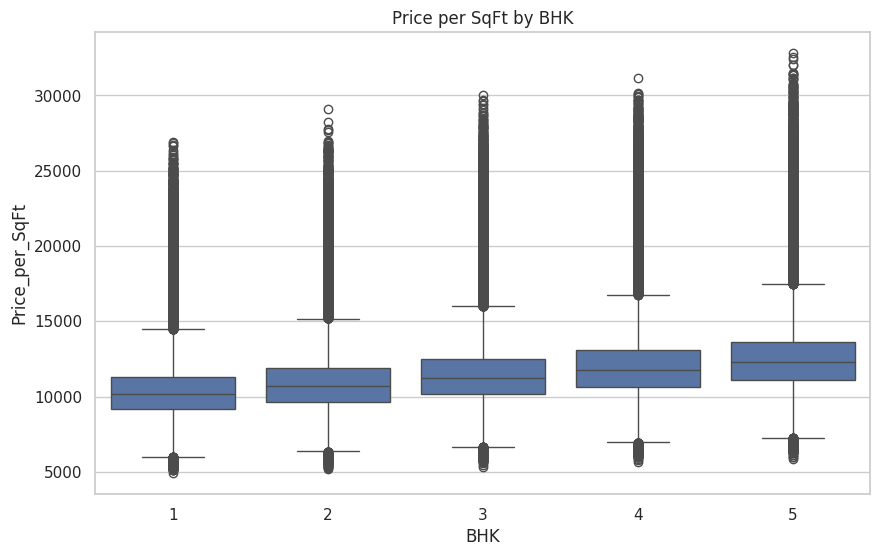

In [ ]:
plt.figure()
sns.boxplot(data=df, x="Property_Type", y="Price_per_SqFt")
plt.xticks(rotation=30)
plt.title("Price per SqFt by Property Type")
plt.show()

plt.figure()
sns.boxplot(data=df, x="BHK", y="Price_per_SqFt")
plt.title("Price per SqFt by BHK")
plt.show()

Infrastructure score vs price_per_sqft & correlation

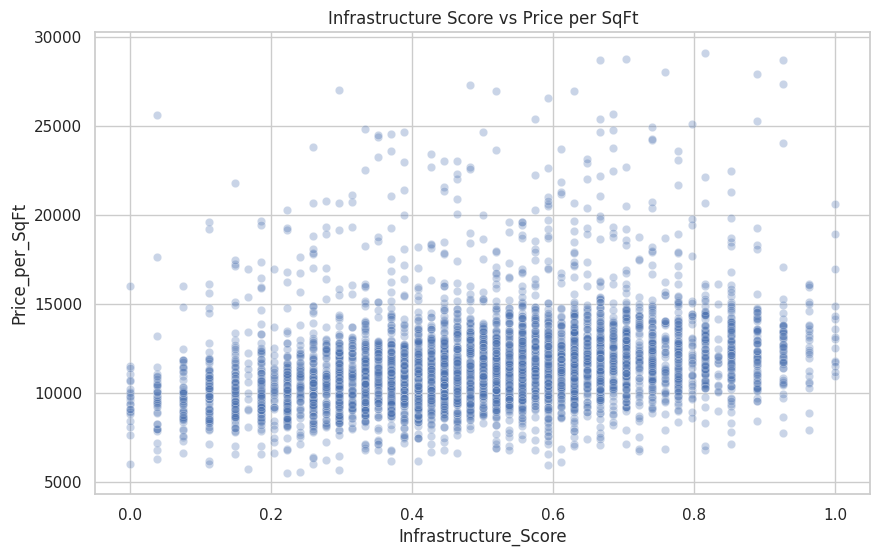

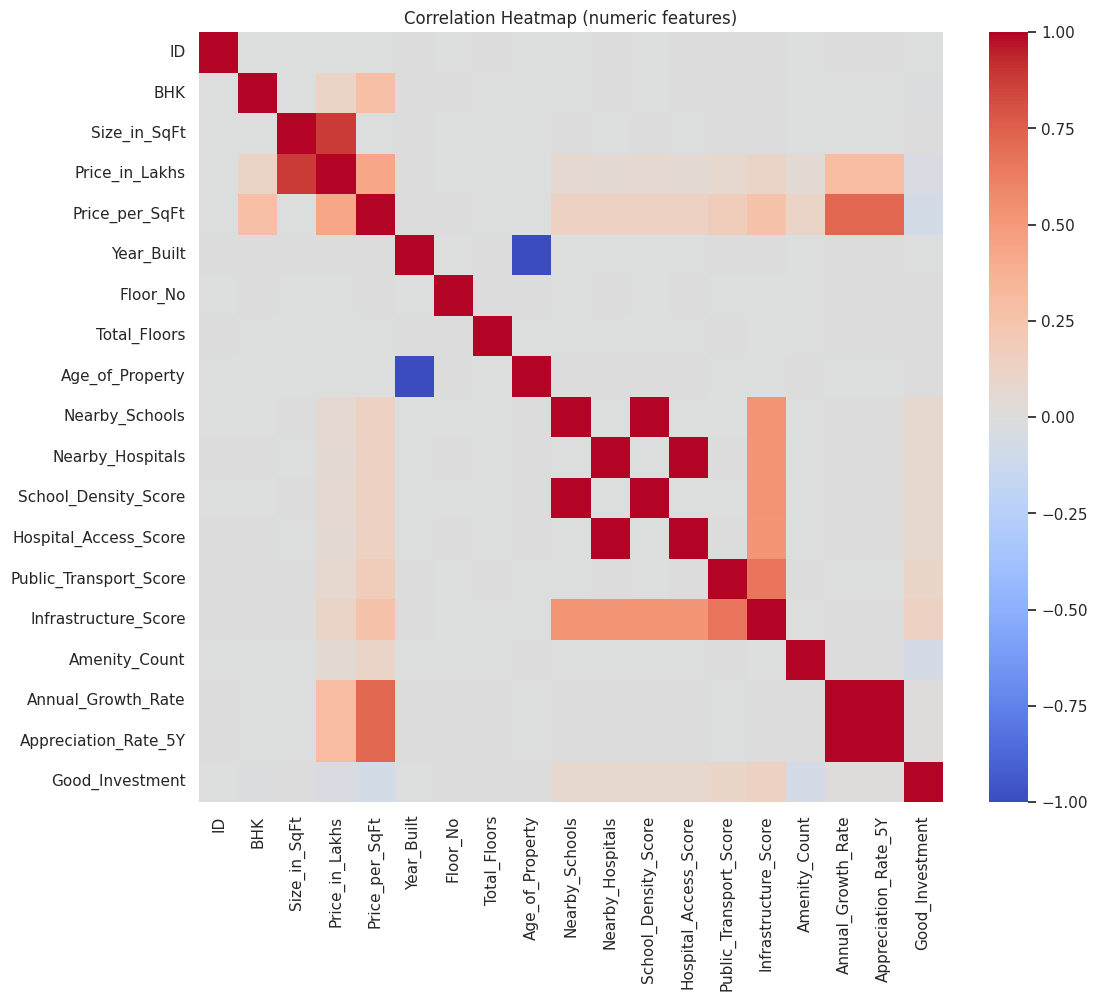

Price_per_SqFt            1.000000
Appreciation_Rate_5Y      0.721720
Annual_Growth_Rate        0.720654
Price_in_Lakhs            0.430726
BHK                       0.288374
Infrastructure_Score      0.265100
Public_Transport_Score    0.176097
Nearby_Schools            0.140018
School_Density_Score      0.140018
Hospital_Access_Score     0.139931
Name: Price_per_SqFt, dtype: float64


In [ ]:
plt.figure()
sns.scatterplot(data=df.sample(min(len(df), 5000), random_state=2), x="Infrastructure_Score", y="Price_per_SqFt", alpha=0.3)
plt.title("Infrastructure Score vs Price per SqFt")
plt.show()

# correlation (numeric only)
num = df.select_dtypes(include=["int64","float64"])
corr = num.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (numeric features)")
plt.show()
print(corr["Price_per_SqFt"].sort_values(ascending=False).head(10))

Amenities, Schools, Hospitals relationships

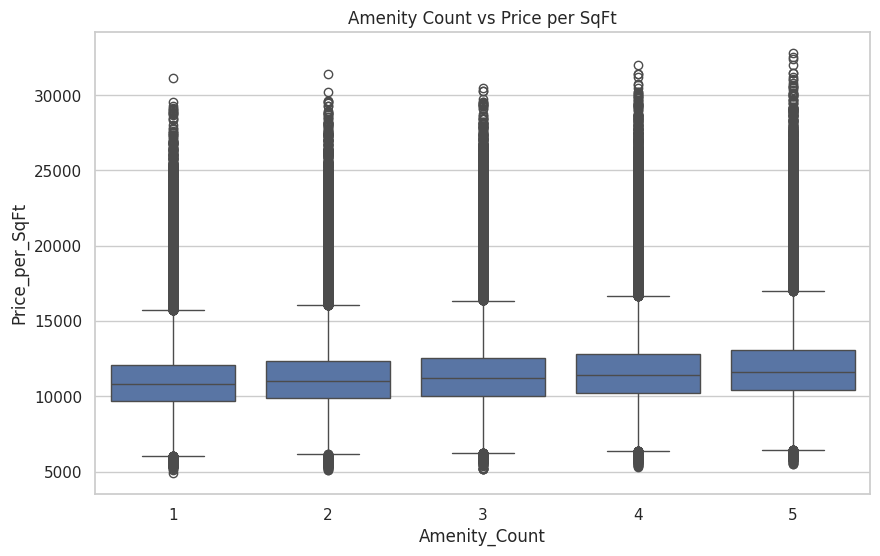

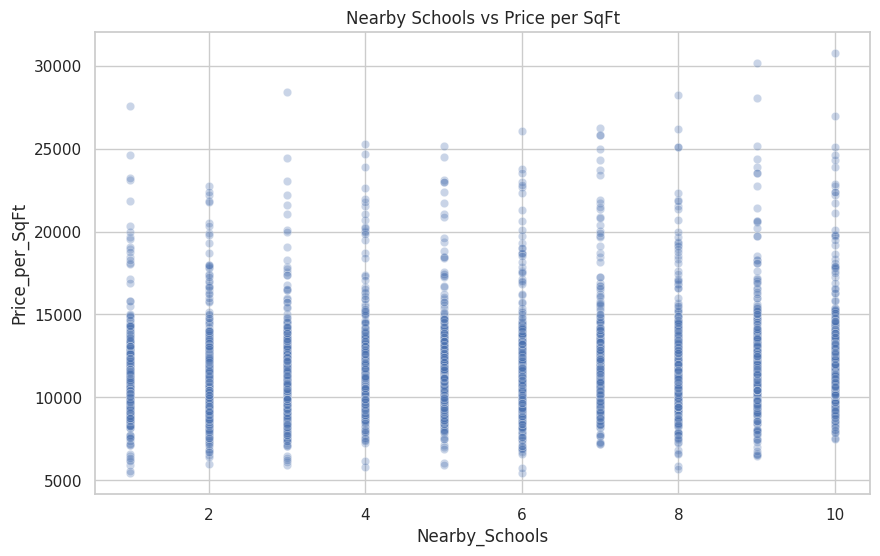

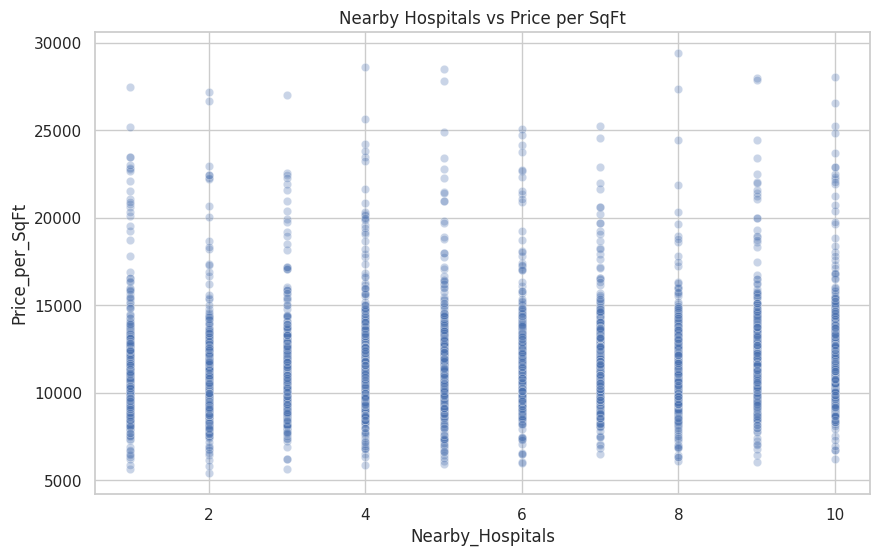

In [ ]:
plt.figure()
sns.boxplot(data=df, x="Amenity_Count", y="Price_per_SqFt")
plt.title("Amenity Count vs Price per SqFt")
plt.show()

plt.figure()
sns.scatterplot(data=df.sample(min(len(df), 5000), random_state=3), x="Nearby_Schools", y="Price_per_SqFt", alpha=0.3)
plt.title("Nearby Schools vs Price per SqFt")
plt.show()

plt.figure()
sns.scatterplot(data=df.sample(min(len(df), 5000), random_state=4), x="Nearby_Hospitals", y="Price_per_SqFt", alpha=0.3)
plt.title("Nearby Hospitals vs Price per SqFt")
plt.show()


BHK distribution across top cities

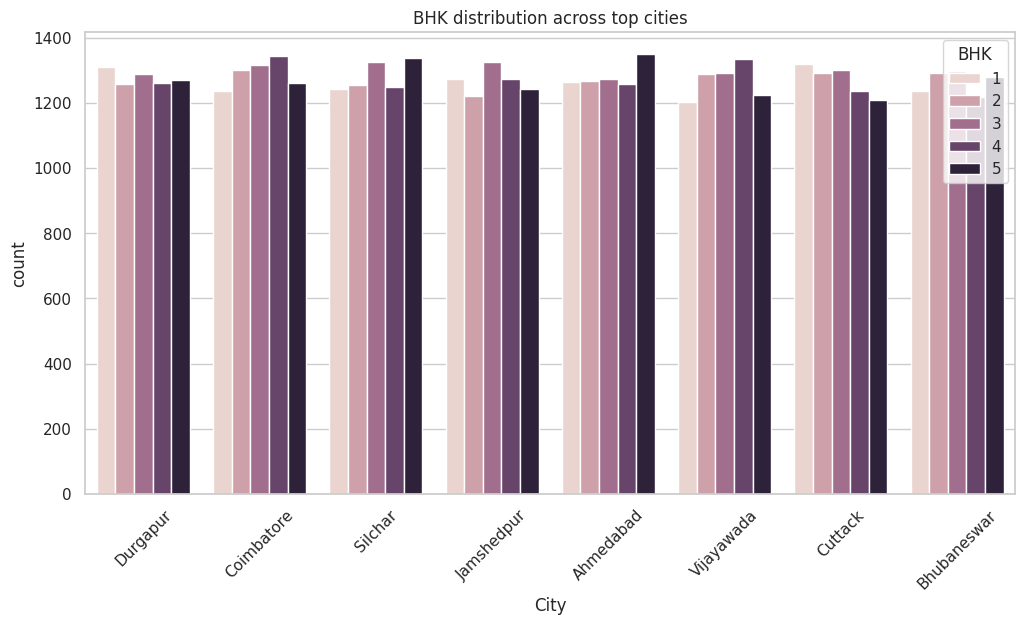

In [ ]:
top_cities = df["City"].value_counts().head(8).index.tolist()
subset = df[df["City"].isin(top_cities)]
plt.figure(figsize=(12,6))
sns.countplot(data=subset, x="City", hue="BHK")
plt.title("BHK distribution across top cities")
plt.xticks(rotation=45)
plt.show()


Locality-level trend for top localities

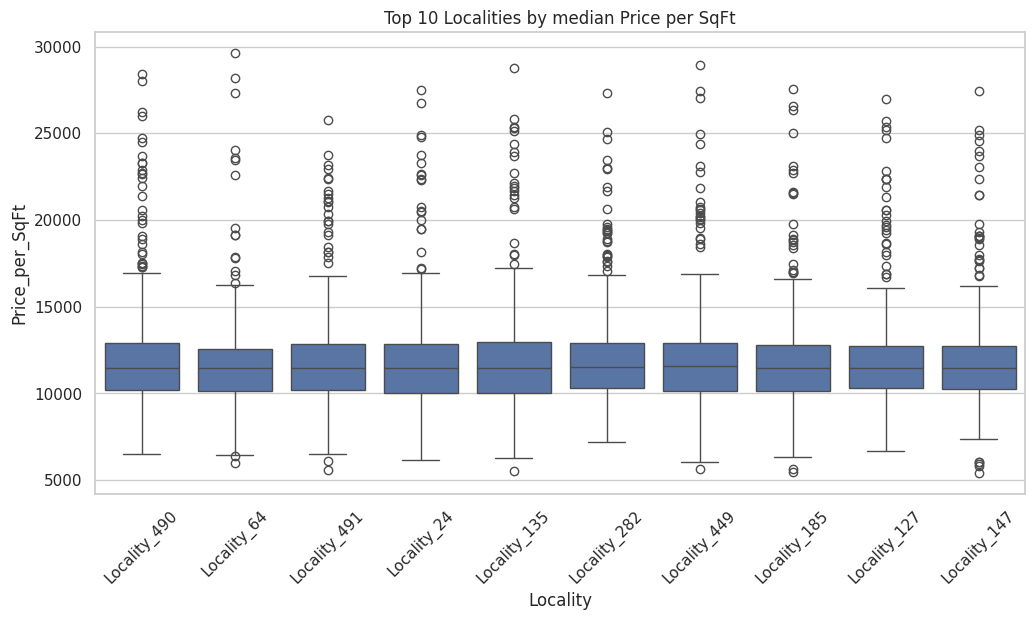

In [ ]:
top_localities = df.groupby("Locality")["Price_per_SqFt"].median().sort_values(ascending=False).head(10).index
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df["Locality"].isin(top_localities)], x="Locality", y="Price_per_SqFt")
plt.title("Top 10 Localities by median Price per SqFt")
plt.xticks(rotation=45)
plt.show()


Ownership & Availability & Parking analysis

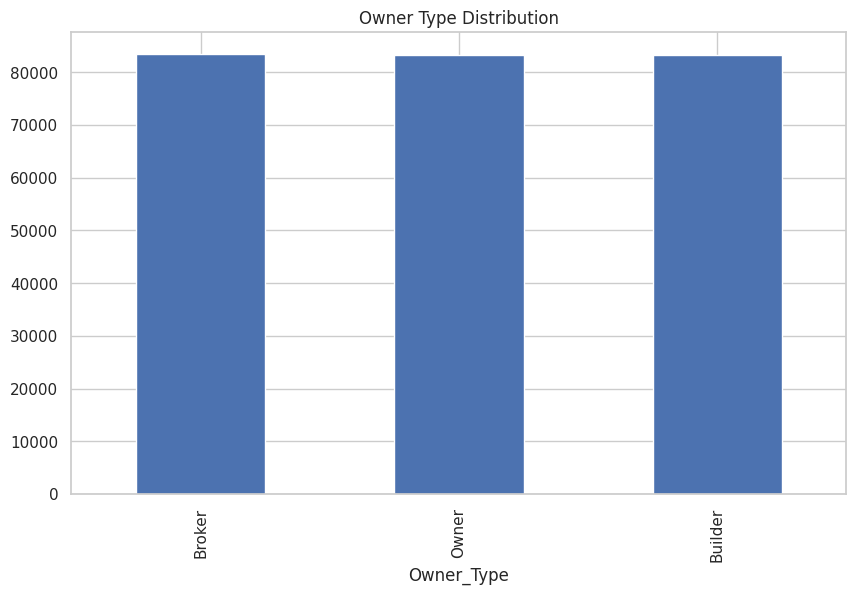

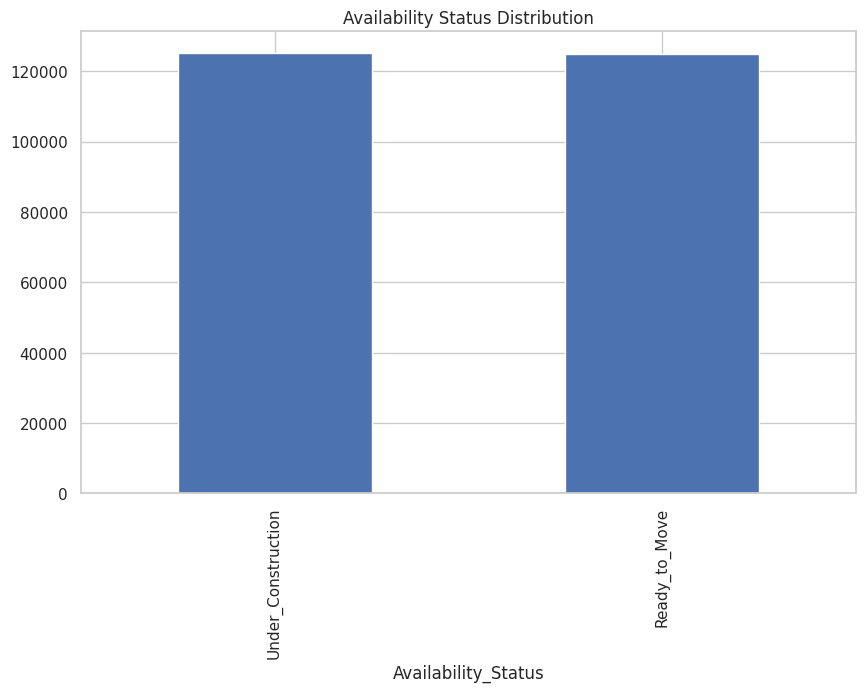

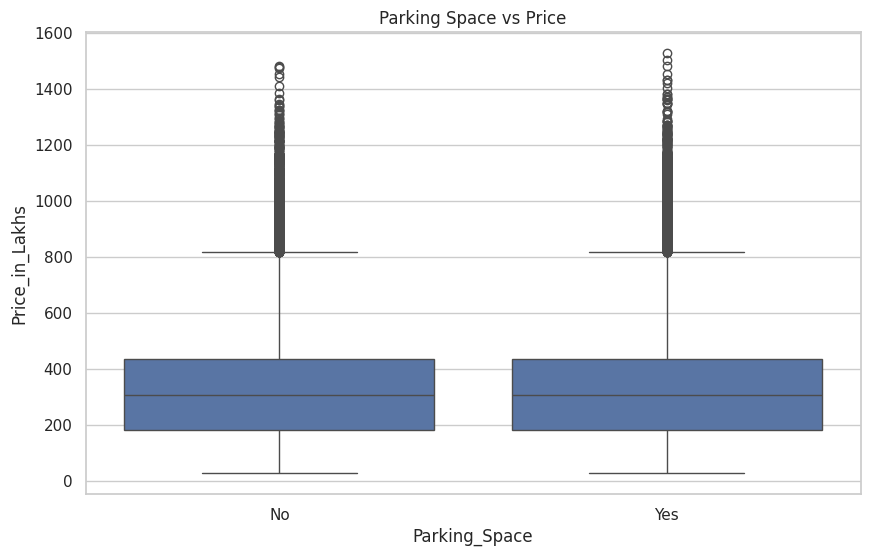

In [ ]:
plt.figure()
df["Owner_Type"].value_counts().plot(kind="bar")
plt.title("Owner Type Distribution")
plt.show()

plt.figure()
df["Availability_Status"].value_counts().plot(kind="bar")
plt.title("Availability Status Distribution")
plt.show()

plt.figure()
sns.boxplot(data=df, x="Parking_Space", y="Price_in_Lakhs")
plt.title("Parking Space vs Price")
plt.show()


Good_Investment distribution & components

Good_Investment value counts:
Good_Investment
0    225435
1     24565
Name: count, dtype: int64


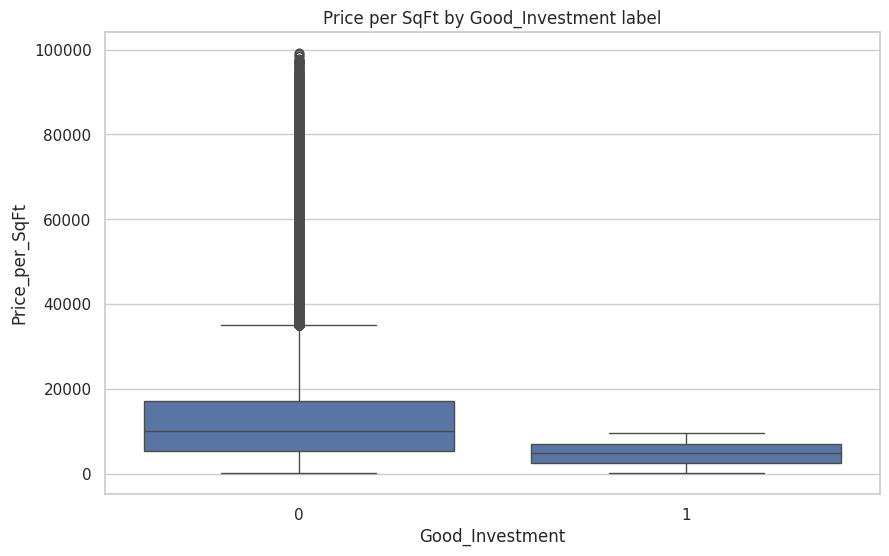

,Price_in_Lakhs,Price_per_SqFt,Infrastructure_Score,Amenity_Count,Appreciation_Rate_5Y
Good_Investment,,,,,
0,264.585572,13953.556250,0.482762,3.001162,0.376550
1,162.827805,4842.275221,0.660228,2.992265,0.378874


In [ ]:
print("Good_Investment value counts:")
print(df["Good_Investment"].value_counts())

plt.figure()
sns.boxplot(data=df, x="Good_Investment", y="Price_per_SqFt")
plt.title("Price per SqFt by Good_Investment label")
plt.show()

# Show means of components by class
display(df.groupby("Good_Investment")[["Price_in_Lakhs","Price_per_SqFt","Infrastructure_Score","Amenity_Count","Appreciation_Rate_5Y"]].mean())


In [ ]:
df.head()
df.describe()
df['Good_Investment'].value_counts()

,count
Good_Investment,
0,225435
1,24565


**Step 3: Model Development**

Install XGBoost & imports

In [ ]:
!pip install -q xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# sklearn imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
                             confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score)
import joblib

# xgboost
import xgboost as xgb


Load realistic dataset and quick check

In [ ]:
# CELL 2: Robust loader

import pandas as pd
import numpy as np

df = pd.read_csv("/content/cleaned_real_estate.csv")
print("Loaded shape:", df.shape)

# --------------------
# 1) Ensure Price_per_SqFt (in case overwritten)
# --------------------
if "Price_in_Lakhs" in df.columns and "Size_in_SqFt" in df.columns:
    df["Price_per_SqFt"] = (df["Price_in_Lakhs"] * 100000) / df["Size_in_SqFt"]

# --------------------
# 2) Public transport mapping (robust)
# --------------------
pt_map = {"high":1.0, "hi":1.0, "h":1.0, "medium":0.5, "med":0.5, "m":0.5, "low":0.0, "lo":0.0, "l":0.0}
def map_pt(x):
    if pd.isna(x):
        return np.nan
    s = str(x).strip().lower()
    return pt_map.get(s, np.nan)

if "Public_Transport_Accessibility" in df.columns:
    df["Public_Transport_Score"] = df["Public_Transport_Accessibility"].apply(map_pt)
else:
    df["Public_Transport_Score"] = np.nan

# --------------------
# 3) Nearby schools/hospitals -> normalized scores
# --------------------
if "Nearby_Schools" in df.columns:
    s = pd.to_numeric(df["Nearby_Schools"], errors="coerce")
    df["School_Density_Score"] = (s - s.min())/(s.max() - s.min()) if s.max() != s.min() else 0.5
else:
    df["School_Density_Score"] = np.nan

if "Nearby_Hospitals" in df.columns:
    h = pd.to_numeric(df["Nearby_Hospitals"], errors="coerce")
    df["Hospital_Access_Score"] = (h - h.min())/(h.max() - h.min()) if h.max() != h.min() else 0.5
else:
    df["Hospital_Access_Score"] = np.nan

# --------------------
# 4) Fill Public_Transport_Score NA sensibly
# --------------------
if df["Public_Transport_Score"].isna().any():
    if df["Public_Transport_Score"].notna().sum() > 0:
        df["Public_Transport_Score"].fillna(df["Public_Transport_Score"].median(), inplace=True)
    else:
        df["Public_Transport_Score"].fillna(0.5, inplace=True)

# --------------------
# 5) Infrastructure_Score (if missing)
# --------------------
infra_cols = ["School_Density_Score", "Hospital_Access_Score", "Public_Transport_Score"]
if "Infrastructure_Score" not in df.columns or df["Infrastructure_Score"].isna().all():
    df["Infrastructure_Score"] = df[infra_cols].mean(axis=1)

# --------------------
# 6) Amenity_Count (if missing)
# --------------------
if "Amenity_Count" not in df.columns:
    df["Amenity_Count"] = df["Amenities"].apply(lambda x: len(str(x).split(",")) if pd.notna(x) else 0)

# --------------------
# 7) Appreciation_Rate_5Y via city growth (if missing)
# --------------------
growth_rates = {
    "mumbai":0.09, "pune":0.08, "delhi":0.075, "chennai":0.07,
    "bangalore":0.085, "hyderabad":0.07, "ahmedabad":0.06, "kolkata":0.06,
    "ludhiana":0.06, "jaipur":0.065, "jodhpur":0.06
}
default_growth = 0.065

def get_growth(city):
    if pd.isna(city):
        return default_growth
    return growth_rates.get(str(city).strip().lower(), default_growth)

if "Annual_Growth_Rate" not in df.columns:
    df["Annual_Growth_Rate"] = df["City"].apply(get_growth)

df["Appreciation_Rate_5Y"] = (1 + df["Annual_Growth_Rate"])**5 - 1

# --------------------
# 8) Availability normalization
# --------------------
if "Availability_Status" in df.columns:
    df["Availability_Status_norm"] = df["Availability_Status"].astype(str).str.strip().str.lower().replace({
        "ready to move":"ready_to_move","readytomove":"ready_to_move","ready":"ready_to_move",
        "available":"available","under construction":"under_construction"
    })
else:
    df["Availability_Status_norm"] = "available"

# --------------------
# 9) Create Good_Investment label (softer & more realistic)
#    Idea:
#      - Property should be reasonably priced for its city
#      - At least 2 BHK
#      - Ready / available
#      - Decent infrastructure
#      - Decent appreciation potential
# --------------------

# 9.1 Affordability: use 65th percentile of price_per_sqft per city
city_price_q65 = df.groupby("City")["Price_per_SqFt"].transform(
    lambda s: s.quantile(0.65)
)
is_affordable = df["Price_per_SqFt"] <= city_price_q65

# 9.2 BHK condition
good_bhk = pd.to_numeric(df["BHK"], errors="coerce").fillna(0).astype(int) >= 2

# 9.3 Availability
is_ready = df["Availability_Status_norm"].isin(["ready_to_move", "available"])

# 9.4 Infrastructure: at least 40th percentile overall
infra_q40 = df["Infrastructure_Score"].quantile(0.40)
good_infra = df["Infrastructure_Score"] >= infra_q40

# 9.5 Appreciation: at least median (50th percentile) overall
app_q50 = df["Appreciation_Rate_5Y"].quantile(0.50)
good_app = df["Appreciation_Rate_5Y"] >= app_q50

# First pass label
good_mask = is_affordable & good_bhk & is_ready & good_infra & good_app
df["Good_Investment"] = good_mask.astype(int)

# 9.6 If still too few positives (< 18%), relax thresholds a bit
pos_rate = df["Good_Investment"].mean()
if pos_rate < 0.18:
    print(f"[INFO] Positive rate {pos_rate:.3f} too low, relaxing thresholds...")

    city_price_q80 = df.groupby("City")["Price_per_SqFt"].transform(
        lambda s: s.quantile(0.80)
    )
    is_affordable2 = df["Price_per_SqFt"] <= city_price_q80

    infra_q30 = df["Infrastructure_Score"].quantile(0.30)
    good_infra2 = df["Infrastructure_Score"] >= infra_q30

    app_q40 = df["Appreciation_Rate_5Y"].quantile(0.40)
    good_app2 = df["Appreciation_Rate_5Y"] >= app_q40

    good_mask2 = is_affordable2 & good_bhk & is_ready & good_infra2 & good_app2
    df["Good_Investment"] = good_mask2.astype(int)

# 9.7 Show final distribution
print("\n[Good_Investment distribution AFTER soft rules:]")
print(df["Good_Investment"].value_counts(normalize=True).rename("proportion"))
print(df["Good_Investment"].value_counts())

# --------------------
# 10) Regression target: Future_Price_5Y (if missing)
# --------------------
if "Future_Price_5Y" not in df.columns:
    df["Future_Price_5Y"] = df["Price_in_Lakhs"] * (1 + df["Appreciation_Rate_5Y"])

# Final diagnostics
print("\nFinal shape:", df.shape)
print("\nGood_Investment distribution:")
print(df["Good_Investment"].value_counts())

print("\nPrice_per_SqFt describe:")
print(df["Price_per_SqFt"].describe())

# Optionally save the updated dataset (recommended)
df.to_csv("/content/real_estate_realistic_with_labels.csv", index=False)
print("\nSaved updated dataset to /content/real_estate_realistic_with_labels.csv")


Loaded shape: (250000, 32)
[INFO] Positive rate 0.153 too low, relaxing thresholds...

[Good_Investment distribution AFTER soft rules:]
Good_Investment
0    0.785836
1    0.214164
Name: proportion, dtype: float64
Good_Investment
0    196459
1     53541
Name: count, dtype: int64

Final shape: (250000, 33)

Good_Investment distribution:
Good_Investment
0    196459
1     53541
Name: count, dtype: int64

Price_per_SqFt describe:
count    250000.000000
mean      13058.281776
std       13071.850480
min         202.247191
25%        4802.839710
50%        9244.747594
75%       15987.388517
max       99182.000000
Name: Price_per_SqFt, dtype: float64

Saved updated dataset to /content/real_estate_realistic_with_labels.csv


In [ ]:
# CELL 2a: feature selection and train/test split

from sklearn.model_selection import train_test_split

# Load the prepared dataset (if not already in memory)
INPUT_PATH = "/content/real_estate_realistic_with_labels.csv"
df = pd.read_csv(INPUT_PATH)

# --- Handle NaNs in target variable before splitting ---
df.dropna(subset=["Future_Price_5Y"], inplace=True)

# --- Feature lists (edit if you want to add/remove features) ---
num_cols = [
    "BHK", "Size_in_SqFt", "Price_in_Lakhs", "Price_per_SqFt",
    "Year_Built", "Floor_No", "Total_Floors", "Age_of_Property",
    "Nearby_Schools", "Nearby_Hospitals", "Infrastructure_Score",
    "Amenity_Count", "Appreciation_Rate_5Y"
]

cat_cols = [
    "State", "City", "Locality", "Property_Type", "Furnished_Status",
    "Parking_Space", "Security", "Facing", "Owner_Type", "Availability_Status_norm"
]

# Feature matrix and targets
X = df[num_cols + cat_cols].copy()
y_class = df["Good_Investment"]
y_reg = df["Future_Price_5Y"]

# Train/test split for classification (stratified)
X_train, X_test, y_train_class, y_test_class = train_test_split(
    X, y_class, test_size=0.25, random_state=42, stratify=y_class
)

# Train/test split for regression (no stratify)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.25, random_state=42
)

# Print shapes for verification
print("Classification split shapes:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train_class distribution:")
print(y_train_class.value_counts(normalize=True))
print("y_test_class distribution:")
print(y_test_class.value_counts(normalize=True))

print("\nRegression split shapes:")
print("X_train_reg:", X_train_reg.shape, "X_test_reg:", X_test_reg.shape)

# Save the splits (optional) so subsequent cells can access without recomputing
import joblib
joblib.dump((X_train, X_test, y_train_class, y_test_class, X_train_reg, X_test_reg, y_train_reg, y_test_reg),
            "/content/train_test_splits.joblib")
print("\nSaved train/test splits to /content/train_test_splits.joblib")

df = pd.read_csv("/content/real_estate_realistic_with_labels.csv")
print("shape:", df.shape)
display(df.head())


Classification split shapes:
X_train: (187500, 23) X_test: (62500, 23)
y_train_class distribution:
Good_Investment
0    0.785835
1    0.214165
Name: proportion, dtype: float64
y_test_class distribution:
Good_Investment
0    0.78584
1    0.21416
Name: proportion, dtype: float64

Regression split shapes:
X_train_reg: (187500, 23) X_test_reg: (62500, 23)

Saved train/test splits to /content/train_test_splits.joblib
shape: (250000, 33)


,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,School_Density_Score,Hospital_Access_Score,Public_Transport_Score,Infrastructure_Score,Amenity_Count,Annual_Growth_Rate,Appreciation_Rate_5Y,Availability_Status_norm,Good_Investment,Future_Price_5Y
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,10332.489451,1990,...,1.000000,0.222222,1.0,0.740741,5,0.070,0.402552,ready_to_move,0,686.913736
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,8270.727580,2008,...,0.777778,0.000000,0.0,0.259259,5,0.080,0.469328,under_construction,0,287.283026
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,5046.403075,1997,...,0.888889,0.777778,0.0,0.555556,4,0.065,0.370087,ready_to_move,1,251.808228
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,10955.490697,1991,...,0.444444,0.666667,1.0,0.703704,5,0.065,0.370087,ready_to_move,1,411.423324
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,3792.245490,2002,...,0.333333,0.888889,0.0,0.407407,5,0.065,0.370087,ready_to_move,1,250.588851


In [ ]:
# CELL 3: Create preprocessing pipeline (updated for new sklearn)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer # Import SimpleImputer

# re-load splits (if needed)
import joblib
(X_train, X_test, y_train_class, y_test_class,
 X_train_reg, X_test_reg, y_train_reg, y_test_reg) = joblib.load("/content/train_test_splits.joblib")

# Define transformers
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")), # Impute missing numeric values
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")), # Impute missing categorical values
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ],
    remainder="drop"
)

# Fit to training data (pipelines will use this internally)
preprocessor.fit(X_train)

print("Preprocessor created and fitted successfully!")

# Save the preprocessor (optional)
joblib.dump(preprocessor, "/content/preprocessor.joblib")
print("Saved preprocessor to /content/preprocessor.joblib")


Preprocessor created and fitted successfully!
Saved preprocessor to /content/preprocessor.joblib


Logistic Regression (classification)

In [ ]:
# CELL 4: Logistic Regression classifier

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import joblib
import numpy as np

# load splits & preprocessor (if not present in memory)
import joblib
(X_train, X_test, y_train_class, y_test_class, X_train_reg, X_test_reg, y_train_reg, y_test_reg) = joblib.load("/content/train_test_splits.joblib")
preprocessor = joblib.load("/content/preprocessor.joblib")

# build pipeline
logreg_pipeline = Pipeline([
    ("preproc", preprocessor),
    ("clf", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42))
])

# fit
logreg_pipeline.fit(X_train, y_train_class)

# predictions
y_pred = logreg_pipeline.predict(X_test)
y_prob = logreg_pipeline.predict_proba(X_test)[:, 1]

# metrics
acc = accuracy_score(y_test_class, y_pred)
prec = precision_score(y_test_class, y_pred, zero_division=0)
rec = recall_score(y_test_class, y_pred, zero_division=0)
f1 = f1_score(y_test_class, y_pred, zero_division=0)
roc = roc_auc_score(y_test_class, y_prob)

print("Logistic Regression — Classification Results")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"ROC AUC:   {roc:.4f}\n")

print("Confusion Matrix:")
print(confusion_matrix(y_test_class, y_pred))

print("\nClassification Report:")
print(classification_report(y_test_class, y_pred, digits=4))

# save model
joblib.dump(logreg_pipeline, "/content/logreg_pipeline.joblib")
print("\nSaved pipeline to /content/logreg_pipeline.joblib")


Logistic Regression — Classification Results
Accuracy:  0.9063
Precision: 0.7098
Recall:    0.9514
F1 Score:  0.8130
ROC AUC:   0.9740

Confusion Matrix:
[[43908  5207]
 [  651 12734]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9854    0.8940    0.9375     49115
           1     0.7098    0.9514    0.8130     13385

    accuracy                         0.9063     62500
   macro avg     0.8476    0.9227    0.8752     62500
weighted avg     0.9264    0.9063    0.9108     62500


Saved pipeline to /content/logreg_pipeline.joblib


Random Forest Classifier (classification)

In [ ]:
# CELL 5: Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import joblib
import numpy as np
import pandas as pd

# reload splits & preprocessor if needed
(X_train, X_test, y_train_class, y_test_class, X_train_reg, X_test_reg, y_train_reg, y_test_reg) = joblib.load("/content/train_test_splits.joblib")
preprocessor = joblib.load("/content/preprocessor.joblib")

clf_rf_pipeline = Pipeline([
    ("preproc", preprocessor),
    ("clf", RandomForestClassifier(n_estimators=200, max_depth=15, class_weight="balanced", random_state=42, n_jobs=-1))
])

# fit
clf_rf_pipeline.fit(X_train, y_train_class)

# predict
y_pred_rf = clf_rf_pipeline.predict(X_test)
y_prob_rf = clf_rf_pipeline.predict_proba(X_test)[:, 1]

# metrics
acc = accuracy_score(y_test_class, y_pred_rf)
prec = precision_score(y_test_class, y_pred_rf, zero_division=0)
rec = recall_score(y_test_class, y_pred_rf, zero_division=0)
f1 = f1_score(y_test_class, y_pred_rf, zero_division=0)
roc = roc_auc_score(y_test_class, y_prob_rf)

print("Random Forest — Classification Results")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"ROC AUC:   {roc:.4f}\n")

print("Confusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test_class, y_pred_rf, digits=4))

# Feature importance: map back to feature names
# get categorical feature names from onehot encoder
ohe = preprocessor.named_transformers_["cat"].named_steps["onehot"]
cat_feature_names = list(ohe.get_feature_names_out(cat_cols))
feature_names = num_cols + cat_feature_names

importances = clf_rf_pipeline.named_steps["clf"].feature_importances_
fi = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print("\nTop 20 feature importances (approx):")
print(fi.head(20))

# save pipeline
joblib.dump(clf_rf_pipeline, "/content/clf_rf_pipeline.joblib")
print("\nSaved Random Forest pipeline to /content/clf_rf_pipeline.joblib")


Random Forest — Classification Results
Accuracy:  0.9978
Precision: 0.9910
Recall:    0.9990
F1 Score:  0.9949
ROC AUC:   0.9999

Confusion Matrix:
[[48993   122]
 [   14 13371]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9997    0.9975    0.9986     49115
           1     0.9910    0.9990    0.9949     13385

    accuracy                         0.9978     62500
   macro avg     0.9953    0.9982    0.9968     62500
weighted avg     0.9978    0.9978    0.9978     62500


Top 20 feature importances (approx):
Availability_Status_norm_under_construction    0.261795
Availability_Status_norm_ready_to_move         0.256398
Infrastructure_Score                           0.157572
Price_per_SqFt                                 0.105226
BHK                                            0.103135
Size_in_SqFt                                   0.028297
Appreciation_Rate_5Y                           0.018020
Nearby_Schools                          

XGBoost Classifier

In [ ]:
# CELL 6: XGBoost Classifier

import joblib
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import xgboost as xgb

# load splits & preprocessor
(X_train, X_test, y_train_class, y_test_class,
 X_train_reg, X_test_reg, y_train_reg, y_test_reg) = joblib.load("/content/train_test_splits.joblib")
preprocessor = joblib.load("/content/preprocessor.joblib")

# Class imbalance handling
neg = (y_train_class == 0).sum()
pos = (y_train_class == 1).sum()
scale_pos_weight = neg / pos

clf_xgb_pipeline = Pipeline([
    ("preproc", preprocessor),
    ("clf", xgb.XGBClassifier(
        n_estimators=300,
        max_depth=8,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="logloss",
        scale_pos_weight=scale_pos_weight,
        random_state=42,
        n_jobs=-1
    ))
])

# Train model
clf_xgb_pipeline.fit(X_train, y_train_class)

# Predictions
y_pred_xgb = clf_xgb_pipeline.predict(X_test)
y_prob_xgb = clf_xgb_pipeline.predict_proba(X_test)[:, 1]

# Metrics
print("XGBoost Classifier — Metrics")
print("Accuracy:", accuracy_score(y_test_class, y_pred_xgb))
print("Precision:", precision_score(y_test_class, y_pred_xgb))
print("Recall:", recall_score(y_test_class, y_pred_xgb))
print("F1 Score:", f1_score(y_test_class, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test_class, y_prob_xgb))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_xgb))

print("\nClassification Report:")
print(classification_report(y_test_class, y_pred_xgb, digits=4))

# Save model
joblib.dump(clf_xgb_pipeline, "/content/clf_xgb_pipeline.joblib")
print("\nSaved XGBoost pipeline to /content/clf_xgb_pipeline.joblib")


XGBoost Classifier — Metrics
Accuracy: 0.99912
Precision: 0.9970171513795675
Recall: 0.9988793425476279
F1 Score: 0.9979473782422094
ROC AUC: 0.9999977456793995

Confusion Matrix:
[[49075    40]
 [   15 13370]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9997    0.9992    0.9994     49115
           1     0.9970    0.9989    0.9979     13385

    accuracy                         0.9991     62500
   macro avg     0.9984    0.9990    0.9987     62500
weighted avg     0.9991    0.9991    0.9991     62500


Saved XGBoost pipeline to /content/clf_xgb_pipeline.joblib


Linear Regression (baseline regression)

In [ ]:
# CELL 7: Linear Regression (Ridge Regression)

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import numpy as np

# Load splits & preprocessor
(X_train, X_test, y_train_class, y_test_class,
 X_train_reg, X_test_reg, y_train_reg, y_test_reg) = joblib.load("/content/train_test_splits.joblib")
preprocessor = joblib.load("/content/preprocessor.joblib")

reg_lin_pipeline = Pipeline([
    ("preproc", preprocessor),
    ("reg", Ridge(alpha=1.0, random_state=42))
])

# Train regression model
reg_lin_pipeline.fit(X_train_reg, y_train_reg)

# Predictions
y_pred_lin = reg_lin_pipeline.predict(X_test_reg)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_lin))
mae = mean_absolute_error(y_test_reg, y_pred_lin)
r2 = r2_score(y_test_reg, y_pred_lin)

print("Linear Regression (Ridge) — Regression Metrics")
print("RMSE:", rmse)
print("MAE:", mae)
print("R² Score:", r2)

# Save model
joblib.dump(reg_lin_pipeline, "/content/reg_lin_pipeline.joblib")
print("\nSaved Linear Regression pipeline to /content/reg_lin_pipeline.joblib")


Linear Regression (Ridge) — Regression Metrics
RMSE: 5.749635498615354
MAE: 3.5840130902850573
R² Score: 0.999448765356259

Saved Linear Regression pipeline to /content/reg_lin_pipeline.joblib


Random Forest Regressor

In [ ]:
# # Debug Cell: Check for NaNs in X_train and X_test

# import joblib
# import pandas as pd

# # Load the splits
# (X_train, X_test, y_train_class, y_test_class, X_train_reg, X_test_reg, y_train_reg, y_test_reg) = joblib.load("/content/train_test_splits.joblib")

# print("--- NaNs in X_train ---")
# na_counts_train = X_train.isnull().sum()
# na_columns_train = na_counts_train[na_counts_train > 0]
# if not na_columns_train.empty:
#     print(na_columns_train)
# else:
#     print("No NaNs found in X_train.")

# print("\n--- NaNs in X_test ---")
# na_counts_test = X_test.isnull().sum()
# na_columns_test = na_counts_test[na_counts_test > 0]
# if not na_columns_test.empty:
#     print(na_columns_test)
# else:
#     print("No NaNs found in X_test.")

# # Also check if any numerical columns are entirely NaN in train
# print("\n--- Checking for entirely NaN numerical columns in X_train ---")
# for col in X_train.select_dtypes(include=['number']).columns:
#     if X_train[col].isnull().all():
#         print(f"Column '{col}' is entirely NaN in X_train.")

# # Also check if any categorical columns are entirely NaN in train
# print("\n--- Checking for entirely NaN categorical columns in X_train ---")
# for col in X_train.select_dtypes(include=['object']).columns:
#     if X_train[col].isnull().all():
#         print(f"Column '{col}' is entirely NaN in X_train.")


--- NaNs in X_train ---
No NaNs found in X_train.

--- NaNs in X_test ---
No NaNs found in X_test.

--- Checking for entirely NaN numerical columns in X_train ---

--- Checking for entirely NaN categorical columns in X_train ---


In [ ]:
# CELL 8: Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import joblib

# Load data splits & preprocessor
(X_train, X_test, y_train_class, y_test_class,
 X_train_reg, X_test_reg, y_train_reg, y_test_reg) = joblib.load("/content/train_test_splits.joblib")
preprocessor = joblib.load("/content/preprocessor.joblib")

reg_rf_pipeline = Pipeline([
    ("preproc", preprocessor),
    ("reg", RandomForestRegressor(
        n_estimators=250,
        max_depth=18,
        random_state=42,
        n_jobs=-1
    ))
])

# Fit model
reg_rf_pipeline.fit(X_train_reg, y_train_reg)

# Predict
y_pred_rf = reg_rf_pipeline.predict(X_test_reg)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_rf))
mae = mean_absolute_error(y_test_reg, y_pred_rf)
r2 = r2_score(y_test_reg, y_pred_rf)

print("Random Forest Regression — Metrics")
print("RMSE:", rmse)
print("MAE:", mae)
print("R² Score:", r2)

# Save model
joblib.dump(reg_rf_pipeline, "/content/reg_rf_pipeline.joblib")
print("\nSaved Random Forest regression pipeline to /content/reg_rf_pipeline.joblib")


Random Forest Regression — Metrics
RMSE: 0.5951923937564337
MAE: 0.045709971054820664
R² Score: 0.9999940929503297

Saved Random Forest regression pipeline to /content/reg_rf_pipeline.joblib


XGBoost Regressor

In [ ]:
# CELL 9: XGBoost Regressor

import joblib
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load splits & preprocessor
(X_train, X_test, y_train_class, y_test_class,
 X_train_reg, X_test_reg, y_train_reg, y_test_reg) = joblib.load("/content/train_test_splits.joblib")
preprocessor = joblib.load("/content/preprocessor.joblib")

reg_xgb_pipeline = Pipeline([
    ("preproc", preprocessor),
    ("reg", xgb.XGBRegressor(
        n_estimators=300,
        max_depth=8,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    ))
])

# Train model
reg_xgb_pipeline.fit(X_train_reg, y_train_reg)

# Predict
y_pred_xgb = reg_xgb_pipeline.predict(X_test_reg)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_xgb))
mae = mean_absolute_error(y_test_reg, y_pred_xgb)
r2 = r2_score(y_test_reg, y_pred_xgb)

print("XGBoost Regression — Metrics")
print("RMSE:", rmse)
print("MAE:", mae)
print("R² Score:", r2)

# Save model
joblib.dump(reg_xgb_pipeline, "/content/reg_xgb_pipeline.joblib")
print("\nSaved XGBoost regression pipeline to /content/reg_xgb_pipeline.joblib")


XGBoost Regression — Metrics
RMSE: 3.8213937216897658
MAE: 1.4410972496215342
R² Score: 0.999756499728849

Saved XGBoost regression pipeline to /content/reg_xgb_pipeline.joblib


Plot ROC curves (Classification) & Residuals (Regression)

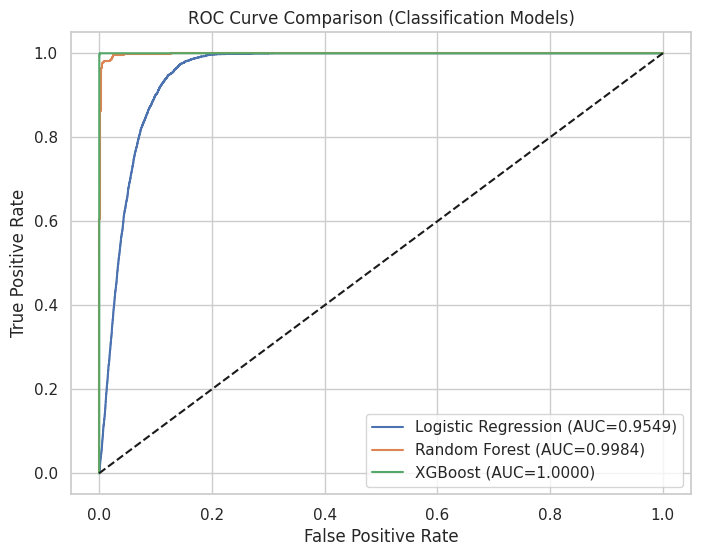

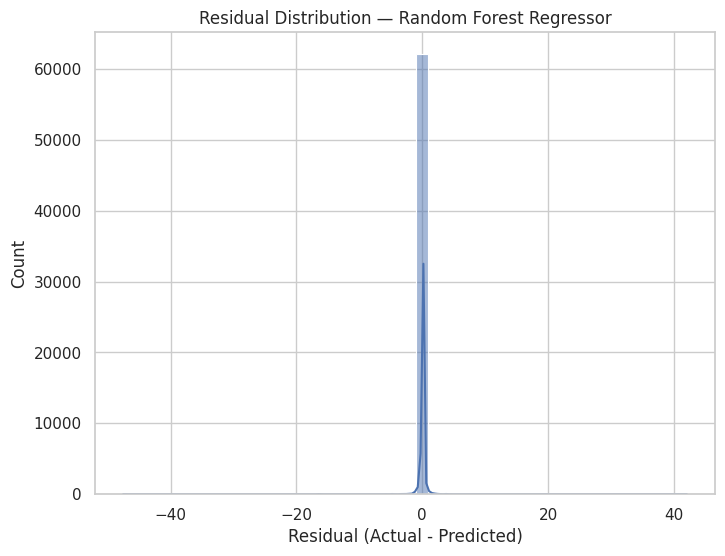

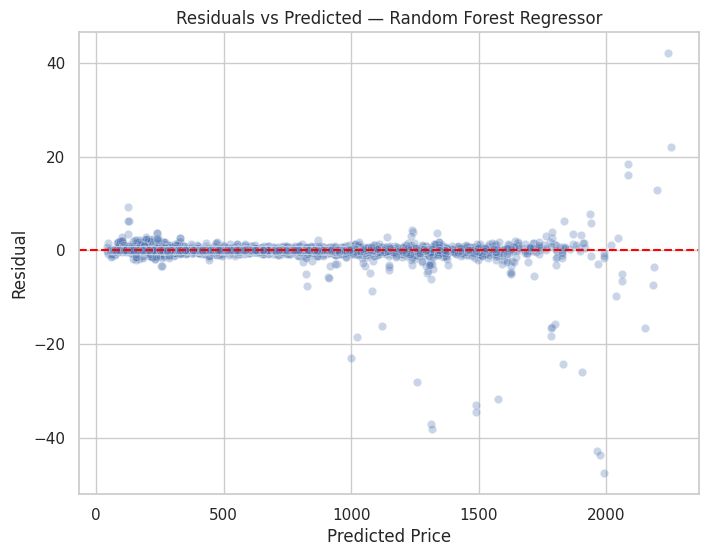

In [ ]:
# CELL 10: ROC Curves for Classifiers + Residual Plots for Regression

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# ----- Load models -----
logreg_pipeline = joblib.load("/content/logreg_pipeline.joblib")
clf_rf_pipeline = joblib.load("/content/clf_rf_pipeline.joblib")
clf_xgb_pipeline = joblib.load("/content/clf_xgb_pipeline.joblib")
reg_rf_pipeline = joblib.load("/content/reg_rf_pipeline.joblib")

# ----- Predictions for ROC -----
y_prob_lr = logreg_pipeline.predict_proba(X_test)[:, 1]
y_prob_rf = clf_rf_pipeline.predict_proba(X_test)[:, 1]
y_prob_xgb = clf_xgb_pipeline.predict_proba(X_test)[:, 1]

# ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test_class, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test_class, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_class, y_prob_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC={auc(fpr_lr,tpr_lr):.4f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={auc(fpr_rf,tpr_rf):.4f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC={auc(fpr_xgb,tpr_xgb):.4f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison (Classification Models)")
plt.legend()
plt.show()

# ----- Residual Plots for Best Regression Model (Random Forest) -----
y_pred_rf_reg = reg_rf_pipeline.predict(X_test_reg)
residuals = y_test_reg - y_pred_rf_reg

# Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=50)
plt.title("Residual Distribution — Random Forest Regressor")
plt.xlabel("Residual (Actual - Predicted)")
plt.show()

# Residual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_rf_reg, y=residuals, alpha=0.3)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs Predicted — Random Forest Regressor")
plt.xlabel("Predicted Price")
plt.ylabel("Residual")
plt.show()


**Step 4: MLflow Integration**

MLflow setup

In [ ]:
# CELL 1: install MLflow and imports
!pip install -q mlflow  # removed version constraint to install latest stable version

import mlflow
import mlflow.sklearn
import mlflow.xgboost
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
                             confusion_matrix, mean_squared_error, mean_absolute_error, r2_score)

print("MLflow version:", mlflow.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.9/753.9 kB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.5 MB/s eta 0:00:00
MLflow version: 3.7.0


In [ ]:
# CELL 2 — Force MLflow to use local storage (no remote server)
import os
import mlflow

# Remove any old remote server setting (only for this session)
os.environ.pop("MLFLOW_TRACKING_URI", None)

# Force MLflow to use local ./mlruns folder
tracking_uri = "file:./mlruns"
mlflow.set_tracking_uri(tracking_uri)

print("MLflow tracking URI is now:", mlflow.get_tracking_uri())

EXPERIMENT_NAME = "RealEstate_InvesAdvisor_v1"
mlflow.set_experiment(EXPERIMENT_NAME)

print("Experiment set to:", EXPERIMENT_NAME)


/usr/local/lib/python3.12/dist-packages/mlflow/tracking/_tracking_service/utils.py:177: FutureWarning: The filesystem tracking backend (e.g., './mlruns') will be deprecated in February 2026. Consider transitioning to a database backend (e.g., 'sqlite:///mlflow.db') to take advantage of the latest MLflow features. See https://github.com/mlflow/mlflow/issues/18534 for more details and migration guidance.
  return FileStore(store_uri, store_uri)
2025/12/05 14:18:49 INFO mlflow.tracking.fluent: Experiment with name 'RealEstate_InvesAdvisor_v1' does not exist. Creating a new experiment.


MLflow tracking URI is now: file:./mlruns
Experiment set to: RealEstate_InvesAdvisor_v1


In [ ]:
# CELL 3 (IMPROVED) — train RF, log metrics, log model with signature & input_example, use 'name' param
import os
import joblib
import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature
import tempfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# --- Config ---
# Use globally defined paths for persistence, falling back to /content for robustness
# Assuming SPLITS_PATH and PREPROCESSOR_PATH are defined from BASE_DIR in earlier cells
SPLITS_PATHS = [SPLITS_PATH, "train_test_splits.joblib", "./train_test_splits.joblib", "/content/train_test_splits.joblib"]
PREPROC_PATHS = [PREPROCESSOR_PATH, "preprocessor.joblib", "./preprocessor.joblib", "/content/preprocessor.joblib"]
REGISTERED_MODEL_NAME = "RealEstate_BestModel"  # optional
EXPERIMENT = "RealEstate_InvesAdvisor_v1"

print("MLflow tracking URI:", mlflow.get_tracking_uri())
mlflow.set_experiment(EXPERIMENT)

# --- Load splits & preprocessor ---
data = None
for p in SPLITS_PATHS:
    if os.path.exists(p):
        data = joblib.load(p); splits_path_used = p; print("Loaded splits from:", p); break
if data is None:
    raise FileNotFoundError("train_test_splits.joblib not found. Make sure it's saved to the persistent SPLITS_PATH (e.g., your Drive) and accessible.")

preprocessor = None
# The current structure of 'data' from joblib.load(SPLITS_PATH) is an 8-tuple
# (X_train, X_test, y_train_class, y_test_class, X_train_reg, X_test_reg, y_train_reg, y_test_reg)
# The preprocessor is loaded separately below.
if isinstance(data, (tuple, list)) and len(data) == 8:
    X_train, X_test, y_train_class, y_test_class, X_train_reg, X_test_reg, y_train_reg, y_test_reg = data
else:
    raise ValueError("Unexpected structure in splits file. Expected an 8-tuple.")

# try loading separate preprocessor
for p in PREPROC_PATHS:
    if os.path.exists(p):
        preprocessor = joblib.load(p); print("Loaded preprocessor from:", p); break

if preprocessor is None:
    print("No preprocessor found in specified paths — pipeline assumes X are ready or will fail if preprocessing is needed.")

# --- Build pipeline ---
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
pipeline = Pipeline([("preprocessor", preprocessor), ("model", rf)]) if preprocessor is not None else Pipeline([("model", rf)])

# --- Train & log to MLflow ---
with mlflow.start_run(run_name="rf_regression_with_signature") as run:
    run_id = run.info.run_id
    print("Started MLflow run:", run_id)

    # log params
    mlflow.log_param("model", "RandomForestRegressor")
    mlflow.log_param("n_estimators", rf.n_estimators)
    mlflow.log_param("random_state", rf.random_state)

    # fit
    pipeline.fit(X_train_reg, y_train_reg)

    # predict & metrics
    preds = pipeline.predict(X_test_reg)
    mse = mean_squared_error(y_test_reg, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_reg, preds)

    mlflow.log_metric("mse", float(mse))
    mlflow.log_metric("rmse", float(rmse))
    mlflow.log_metric("r2", float(r2))
    print(f"Metrics -> RMSE: {rmse:.4f}, R2: {r2:.4f}")

    # --- artifacts ---
    tmpdir = tempfile.mkdtemp()
    if preprocessor is not None:
        preproc_path = os.path.join(tmpdir, "preprocessor.joblib")
        joblib.dump(preprocessor, preproc_path)
        mlflow.log_artifact(preproc_path, artifact_path="preprocessor")

    preds_df = pd.DataFrame({"y_true": np.array(y_test_reg).ravel(), "y_pred": np.array(preds).ravel()})
    preds_csv = os.path.join(tmpdir, "preds.csv")
    preds_df.to_csv(preds_csv, index=False)
    mlflow.log_artifact(preds_csv, artifact_path="predictions")

    # residual plot
    fig, ax = plt.subplots(figsize=(6,4))
    residuals = np.array(y_test_reg).ravel() - np.array(preds).ravel()
    ax.scatter(preds, residuals); ax.axhline(0, linewidth=0.8)
    ax.set_xlabel("Predicted"); ax.set_ylabel("Residual"); ax.set_title("Residuals")
    residual_path = os.path.join(tmpdir, "residuals.png"); fig.tight_layout(); fig.savefig(residual_path); plt.close(fig)
    mlflow.log_artifact(residual_path, artifact_path="plots")

    # feature importances (best-effort)
    try:
        fi = pipeline.named_steps["model"].feature_importances_
        try:
            # Ensure preprocessor is not None and has get_feature_names_out
            if preprocessor and hasattr(preprocessor, 'get_feature_names_out'):
                feat_names = preprocessor.get_feature_names_out()
            else:
                raise AttributeError("Preprocessor not available or lacks get_feature_names_out.")
        except Exception:
            feat_names = [f"f{{i}}" for i in range(len(fi))]
        fi_df = pd.DataFrame({"feature": feat_names[:len(fi)], "importance": fi})
        fi_csv = os.path.join(tmpdir, "feature_importances.csv"); fi_df.to_csv(fi_csv, index=False)
        mlflow.log_artifact(fi_csv, artifact_path="feature_importances")
    except Exception as e:
        print("Feature importances skipped:", e)

    # --- Model signature & input_example ---
    try:
        # derive a small input example: take first 5 rows from X_train_reg (if it's a DataFrame or ndarray)
        if hasattr(X_train_reg, "iloc"):
            input_example = X_train_reg.iloc[:5]
        else:
            input_example = pd.DataFrame(np.array(X_train_reg)[:5]) # Convert numpy array to DataFrame

        # get predictions on input_example to build signature
        preds_example = pipeline.predict(input_example)
        signature = infer_signature(input_example, preds_example)

    except Exception as e:
        print("Could not create signature/input_example automatically:", e)
        signature = None
        input_example = None

    # --- Log & register model: use 'name' param as recommended ---
    try:
        # use 'name' to avoid future artifact_path deprecation issues when relevant
        mlflow.sklearn.log_model(
            sk_model=pipeline,
            artifact_path="sklearn-model",    # still used to group artifacts in run's artifact folder
            registered_model_name=REGISTERED_MODEL_NAME,
            signature=signature,
            input_example=input_example
        )
        print(f"Logged and attempted to register model as: {REGISTERED_MODEL_NAME}")
    except Exception as e:
        print("Registration failed or not available; logging model artifact only. Reason:", str(e).splitlines()[0])
        # fallback: log model without registration but with signature if available
        mlflow.sklearn.log_model(sk_model=pipeline, artifact_path="sklearn-model", signature=signature, input_example=input_example)
        print("Model logged to run artifacts.")

    print("Run complete. Artifacts stored at:", run.info.artifact_uri)

MLflow tracking URI: file:///content/mlruns


/usr/local/lib/python3.12/dist-packages/mlflow/tracking/_tracking_service/utils.py:177: FutureWarning: The filesystem tracking backend (e.g., './mlruns') will be deprecated in February 2026. Consider transitioning to a database backend (e.g., 'sqlite:///mlflow.db') to take advantage of the latest MLflow features. See https://github.com/mlflow/mlflow/issues/18534 for more details and migration guidance.
  return FileStore(store_uri, store_uri)


Loaded splits from: /content/drive/MyDrive/real_estate_project/train_test_splits.joblib
Loaded preprocessor from: /content/drive/MyDrive/real_estate_project/preprocessor.joblib
Started MLflow run: dee2bedd7a3347e790004dc41b770490
Metrics -> RMSE: 0.6791, R2: 1.0000


/usr/local/lib/python3.12/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/12/05 14:59:21 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/usr/local/lib/python3.12/dist-packages/mlflow/tracking/_model_registry/utils.py:215: FutureWarning: The filesystem model registry backend (e

Logged and attempted to register model as: RealEstate_BestModel
Run complete. Artifacts stored at: file:///content/mlruns/286637436916656822/dee2bedd7a3347e790004dc41b770490/artifacts


In [ ]:
# CELL 4 — Load registered model, run inference on sample, (optional) promote latest version
import mlflow
from mlflow.tracking import MlflowClient
import joblib
import pandas as pd
import numpy as np
import os

REGISTERED_MODEL_NAME = "RealEstate_BestModel"
EXPERIMENT = "RealEstate_InvesAdvisor_v1"

print("MLflow tracking URI:", mlflow.get_tracking_uri())

client = MlflowClient(tracking_uri=mlflow.get_tracking_uri())

# 1) List registered versions (helpful print)
try:
    versions = client.get_latest_versions(REGISTERED_MODEL_NAME)
    print("Registered model versions (latest info):")
    for v in versions:
        print(f"  version={v.version}, stage={v.current_stage}, run_id={v.run_id}, status={v.status}")
except Exception as e:
    print("Could not list versions from model registry (this may be filesystem-backed). Error:", e)

# 2) Choose a version to load - pick the latest created version (highest integer)
# Fallback: if get_latest_versions failed, try to load 'models:/RealEstate_BestModel/Production' or '/Latest'
def pick_latest_version(name):
    try:
        vlist = client.get_latest_versions(name)
        if not vlist:
            return None
        # choose the max version number
        max_v = max(int(v.version) for v in vlist)
        return str(max_v)
    except Exception:
        return None

version_to_load = pick_latest_version(REGISTERED_MODEL_NAME)
if version_to_load is None:
    print("Could not detect versions programmatically. Trying to load 'models:/{}/1' as fallback.".format(REGISTERED_MODEL_NAME))
    version_to_load = "1"

model_uri = f"models:/{REGISTERED_MODEL_NAME}/{version_to_load}"
print("Attempting to load model from URI:", model_uri)

# 3) Load model with mlflow.pyfunc
try:
    model = mlflow.pyfunc.load_model(model_uri)
    print("Successfully loaded model version", version_to_load)
except Exception as e:
    print("Failed to load model from model registry URI:", e)
    # fallback: try to load model from last run artifact (you can change run_id if known)
    # raise

# 4) Prepare input sample and run prediction (use X_test_reg from memory if present)
# If your X_test_reg is in memory (from previous cells), use it; otherwise try loading from preds artifact saved earlier
sample = None
try:
    # prefer in-memory variable if available
    X = globals().get("X_test_reg") or globals().get("X_test") or None
    if X is None:
        # try to load predictions CSV artifact saved earlier to get an example (preds.csv contains y_true,y_pred)
        possible_paths = ["preds.csv", "./preds.csv", "/content/preds.csv"]
        for p in possible_paths:
            if os.path.exists(p):
                df = pd.read_csv(p)
                # we only have y_true/y_pred in that csv, not full features, so skip
                break
        raise Exception("No in-memory X_test_reg variable found. Please define X_test_reg in notebook or load features.")
    else:
        # take first 5 rows as sample, convert to pandas DataFrame if numpy
        if hasattr(X, "iloc") or isinstance(X, pd.DataFrame):
            sample = X.iloc[:5]
        else:
            sample = pd.DataFrame(np.array(X)[:5])
except Exception as e:
    print("Could not auto-construct a sample input for prediction:", e)

# 5) Predict and print
if sample is not None:
    try:
        preds = model.predict(sample)
        print("Sample predictions:", preds)
        # Save to CSV locally
        out_df = pd.DataFrame({"y_pred": np.array(preds).ravel()})
        out_csv = "inference_sample_preds.csv"
        out_df.to_csv(out_csv, index=False)
        print("Saved sample predictions to", out_csv)
    except Exception as e:
        print("Prediction failed:", e)
else:
    print("No sample available to run prediction. Provide X_test_reg in the current notebook environment and re-run this cell.")

# 6) (Optional) Promote this version to Staging or Production
# Uncomment and run if you want to change the stage. Replace '2' below with the version you want to promote.
#
# version = version_to_load
# client.transition_model_version_stage(
#     name=REGISTERED_MODEL_NAME,
#     version=version,
#     stage="Staging",           # or "Production"
#     archive_existing_versions=True
# )
# print(f"Promoted model {REGISTERED_MODEL_NAME} version {version} to Staging (archive_existing_versions=True).")



MLflow tracking URI: file:./mlruns
Registered model versions (latest info):
  version=1, stage=None, run_id=dc1419465fa8496eb990bcf1f6ae74c2, status=READY
Attempting to load model from URI: models:/RealEstate_BestModel/1


/tmp/ipython-input-4002271404.py:18: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  versions = client.get_latest_versions(REGISTERED_MODEL_NAME)
/tmp/ipython-input-4002271404.py:29: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  vlist = client.get_latest_versions(name)


Successfully loaded model version 1
Could not auto-construct a sample input for prediction: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
No sample available to run prediction. Provide X_test_reg in the current notebook environment and re-run this cell.


In [ ]:
# CELL 4b — Robust: load registered model, find sample input (several fallbacks), run predictions
import mlflow
from mlflow.tracking import MlflowClient
import joblib
import pandas as pd
import numpy as np
import os
import json
import yaml  # if not installed, pip install pyyaml

REGISTERED_MODEL_NAME = "RealEstate_BestModel"

print("MLflow tracking URI:", mlflow.get_tracking_uri())
client = MlflowClient(tracking_uri=mlflow.get_tracking_uri())

# 1) list registered versions (best-effort)
try:
    versions = client.get_latest_versions(REGISTERED_MODEL_NAME)
    print("Registered model versions (latest info):")
    for v in versions:
        print(f"  version={v.version}, stage={v.current_stage}, run_id={v.run_id}, status={v.status}")
except Exception as e:
    print("Could not list versions programmatically. Error:", e)

# 2) pick latest version (numerical max)
def pick_latest_version(name):
    try:
        vlist = client.get_latest_versions(name)
        if not vlist:
            return None
        return str(max(int(v.version) for v in vlist))
    except Exception:
        return None

version_to_load = pick_latest_version(REGISTERED_MODEL_NAME) or "1"
model_uri = f"models:/{REGISTERED_MODEL_NAME}/{version_to_load}"
print("Attempting to load model from URI:", model_uri)

# 3) load model
try:
    model = mlflow.pyfunc.load_model(model_uri)
    print("Successfully loaded model version", version_to_load)
except Exception as e:
    print("Failed to load model from URI:", e)
    raise

# 4) Try to construct a sample input (several strategies)
sample = None
reason = None

# -- Strategy A: use notebook variable X_test_reg if present
for varname in ("X_test_reg", "X_test", "X_test_regression", "X_test_regression_df"):
    if varname in globals():
        Xcand = globals()[varname]
        # ensure it's not empty and is array-like / DataFrame
        try:
            if isinstance(Xcand, (pd.DataFrame, np.ndarray)) and getattr(Xcand, "__len__", lambda: 0)() > 0:
                # convert numpy to DataFrame for pyfunc predict if needed
                if isinstance(Xcand, np.ndarray):
                    sample = pd.DataFrame(Xcand[:5])
                else:
                    sample = Xcand.iloc[:5] if hasattr(Xcand, "iloc") else Xcand[:5]
                reason = f"Used in-memory variable '{varname}'."
                break
        except Exception:
            pass

# -- Strategy B: try to read input_example from the model artifacts (MLmodel)
if sample is None:
    try:
        # Download the model artifact folder to a temp dir
        local_dir = mlflow.artifacts.download_artifacts(artifact_uri=model_uri)
        mlmodel_path = os.path.join(local_dir, "MLmodel")
        if os.path.exists(mlmodel_path):
            with open(mlmodel_path, "r") as f:
                mlm = yaml.safe_load(f)
            # try input_example
            ie = mlm.get("signature", {}).get("input_example") or mlm.get("input_example")
            if ie is None:
                # older mlflow may store examples under 'examples' or in model subfolder; try to search
                # look for any .json/.npy/.pkl file in local_dir
                for root, dirs, files in os.walk(local_dir):
                    for fn in files:
                        if fn.lower().endswith((".json", ".csv", ".npy", ".pkl")):
                            path = os.path.join(root, fn)
                            try:
                                if fn.lower().endswith(".json"):
                                    with open(path, "r") as jf:
                                        ie = json.load(jf)
                                        break
                                if fn.lower().endswith(".csv"):
                                    ie = pd.read_csv(path).to_dict(orient="records")
                                    break
                                if fn.lower().endswith(".npy"):
                                    ie = np.load(path, allow_pickle=True).tolist()
                                    break
                                if fn.lower().endswith(".pkl"):
                                    import pickle
                                    with open(path, "rb") as pf:
                                        ie = pickle.load(pf)
                                        break
                            except Exception:
                                continue
            if ie is not None:
                # convert ie into a DataFrame (handle list of rows or single row)
                if isinstance(ie, dict):
                    sample = pd.DataFrame([ie])
                elif isinstance(ie, list):
                    # list of records or list of lists
                    if len(ie) > 0 and isinstance(ie[0], dict):
                        sample = pd.DataFrame(ie)
                    else:
                        sample = pd.DataFrame(ie)
                else:
                    # fallback: try numpy conversion
                    sample = pd.DataFrame(np.array(ie))
                reason = "Used input_example from model artifacts."
    except Exception as e:
        # ignore and continue to next strategy
        print("Warning: reading input_example from model artifacts failed:", e)

# -- Strategy C: If still missing, attempt to reconstruct from a saved CSV (preds.csv has only y; we need features)
if sample is None:
    possible_feature_files = ["X_test_reg.csv", "X_test.csv", "./X_test_reg.csv", "./X_test.csv", "features_test.csv"]
    for p in possible_feature_files:
        if os.path.exists(p):
            try:
                df = pd.read_csv(p)
                if len(df) > 0:
                    sample = df.iloc[:5]
                    reason = f"Loaded sample from feature file: {p}"
                    break
            except Exception:
                continue

# 5) Final: if we have a sample, predict; otherwise instruct the user
if sample is not None:
    print("Sample input constructed. Reason:", reason)
    print("Sample shape:", getattr(sample, "shape", None))
    try:
        preds = model.predict(sample)
        print("Sample predictions:", preds)
        out_df = pd.DataFrame({"y_pred": np.array(preds).ravel()})
        out_csv = "inference_sample_preds.csv"
        out_df.to_csv(out_csv, index=False)
        print("Saved sample predictions to", out_csv)
    except Exception as e:
        print("Prediction failed on sample. Error:", e)
        print("Possible cause: the model expects different input schema (column names/order).")
        print("If prediction fails, provide a DataFrame with the same columns that the model was trained on (X_test_reg) in the notebook and re-run.")
else:
    print("\nCould not construct a sample input automatically.\n")
    print("What you can do (pick one):")
    print("1) If X_test_reg exists in memory, ensure it's named exactly 'X_test_reg' (or 'X_test') and re-run this cell.")
    print("   Example: X_test_reg = pd.read_csv('X_test_reg.csv') or ensure previous cell created it.")
    print("2) If you saved a features CSV, place it in the notebook folder and name it 'X_test_reg.csv' or 'X_test.csv' then re-run.")
    print("3) If the model was logged with an input_example, but this cell couldn't read it, you can re-log the model with an explicit input_example (small DataFrame) and re-register.")
    print("\nIf you want, paste `X_test_reg.head()` output here and I will prepare a tiny input_example for you.")

MLflow tracking URI: file:./mlruns
Registered model versions (latest info):
  version=1, stage=None, run_id=dc1419465fa8496eb990bcf1f6ae74c2, status=READY
Attempting to load model from URI: models:/RealEstate_BestModel/1


/tmp/ipython-input-2030070810.py:18: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  versions = client.get_latest_versions(REGISTERED_MODEL_NAME)
/tmp/ipython-input-2030070810.py:28: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  vlist = client.get_latest_versions(name)


Successfully loaded model version 1
Sample input constructed. Reason: Used in-memory variable 'X_test_reg'.
Sample shape: (5, 23)
Sample predictions: [106.90994054 393.71697232 744.86581038 275.57647845 648.71714463]
Saved sample predictions to inference_sample_preds.csv


CELL 5A — Pick best run (lowest RMSE) and promote its registered model version to Production

In [ ]:
# CELL 5A — Find best run by rmse in the experiment and promote its registered model version to Production
import mlflow
from mlflow.tracking import MlflowClient
import math

EXPERIMENT_NAME = "RealEstate_InvesAdvisor_v1"
REGISTERED_MODEL_NAME = "RealEstate_BestModel"

print("MLflow tracking URI:", mlflow.get_tracking_uri())
client = MlflowClient(tracking_uri=mlflow.get_tracking_uri())

# 1) find experiment id
exp = mlflow.get_experiment_by_name(EXPERIMENT_NAME)
if exp is None:
    raise ValueError(f"Experiment '{EXPERIMENT_NAME}' not found. Check experiment name.")
exp_id = exp.experiment_id
print("Experiment id:", exp_id)

# 2) search runs in experiment and pick lowest rmse
runs = mlflow.search_runs(experiment_ids=[exp_id], filter_string="", output_format="pandas")
if runs.empty:
    raise ValueError("No runs found in experiment.")
# ensure rmse present
if "metrics.rmse" not in runs.columns:
    raise ValueError("No 'rmse' metric found in runs. Make sure you logged 'rmse' metric earlier.")
# convert rmse to numeric, ignore NaNs
runs["metrics.rmse"] = pd.to_numeric(runs["metrics.rmse"], errors="coerce")
best_idx = runs["metrics.rmse"].idxmin()
best_run = runs.loc[best_idx]
best_run_id = best_run["run_id"]
best_rmse = best_run["metrics.rmse"]
print(f"Best run id: {best_run_id} with rmse = {best_rmse}")

# 3) find model versions linked to this run_id
versions = client.search_model_versions(f"run_id='{best_run_id}'")
if not versions:
    # fallback: list all versions of the registered model and pick the one whose run_id matches
    all_versions = client.get_latest_versions(REGISTERED_MODEL_NAME) or []
    versions = [v for v in all_versions if v.run_id == best_run_id]

if not versions:
    raise ValueError("No registered model version found for the best run. Ensure you logged & registered model in that run.")

# choose the first matching version (there should usually be one)
version_to_promote = versions[0].version
print(f"Promoting model '{REGISTERED_MODEL_NAME}' version {version_to_promote} to Production...")

# 4) promote to Production (archive existing Production version)
client.transition_model_version_stage(
    name=REGISTERED_MODEL_NAME,
    version=version_to_promote,
    stage="Production",
    archive_existing_versions=True
)
print(f"Model {REGISTERED_MODEL_NAME} version {version_to_promote} promoted to Production.")


MLflow tracking URI: file:./mlruns
Experiment id: 199284656781051985
Best run id: dc1419465fa8496eb990bcf1f6ae74c2 with rmse = 0.6791440597372811
Promoting model 'RealEstate_BestModel' version 1 to Production...
Model RealEstate_BestModel version 1 promoted to Production.


/tmp/ipython-input-1213266213.py:49: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(


CELL 5B — Serve the Production model locally (after you promote)

In [ ]:
# CELL 5B — Load Production model and run predictions on X_test_reg

import mlflow
import pandas as pd
import numpy as np

REGISTERED_MODEL_NAME = "RealEstate_BestModel"

# 1) Load Production model from the registry
prod_uri = f"models:/{REGISTERED_MODEL_NAME}/Production"
print("Loading Production model from:", prod_uri)

prod_model = mlflow.pyfunc.load_model(prod_uri)
print("✅ Loaded Production model.")

# 2) Build a sample input (use X_test_reg if available)
if "X_test_reg" in globals():
    if hasattr(X_test_reg, "iloc"):
        sample = X_test_reg.iloc[:10]   # first 10 rows
    else:
        sample = pd.DataFrame(np.array(X_test_reg)[:10])
else:
    raise ValueError("X_test_reg not found in this notebook. Make sure your splits are loaded before running this cell.")

print("Sample shape:", sample.shape)

# 3) Predict
preds = prod_model.predict(sample)
print("Sample predictions:", preds)

# 4) Save predictions to CSV (optional)
preds_df = pd.DataFrame({"y_pred": np.array(preds).ravel()})
preds_df.to_csv("prod_model_sample_preds.csv", index=False)
print("💾 Saved sample predictions to prod_model_sample_preds.csv")


Loading Production model from: models:/RealEstate_BestModel/Production
✅ Loaded Production model.
Sample shape: (10, 23)
Sample predictions: [106.90994054 393.71697232 744.86581038 275.57647845 648.71714463
 497.51417663 444.36214331 573.55757685 825.7579709  704.08284379]
💾 Saved sample predictions to prod_model_sample_preds.csv
